# Predicting St. Louis Sales with Economic Indicators

#### This project considers sales data in St. Louis from 2010-2019, and uses this data along with various economic indicators to predict sales after 2019.  all data comes from <a href="https://fred.stlouisfed.org/">https://fred.stlouisfed.org/</a>.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

C:\Users\charl\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [28]:
df=pd.read_csv('All_Data_Formatted.csv')

### Key to dataframe columns:

#### Sales Data: Millions of Dollars, Monthly, Seasonally Adjusted

RSAFS:	  Retail Trade and Food Services

RSFSXMV:	  Retail Trade and Food Services, Excluding Motor Vehicle and Parts Dealers

RSHPCS:	  Health and Personal Care Stores

RSGASS:	  Gasoline Stations

RSCCAS:	  Clothing and Clothing Accessory Stores

RSSGHBMS:  Sporting Goods, Hobby, Musical Instrument, and Book Stores

RSGMS:	  General Merchandise Stores

RSDSELD:	  Department Stores

RSMSR:	   Miscellaneous Store Retailers

RSNSR:	  Nonstore Retailers

RSFSDP:	  Food Services and Drinking Places

RSXFS:	  Retail Trade

#### Indicator Data

break_inflate10:10 year inflation rate

cpi: Consumer Price Index

employ_rate: Employment Rate Ages 15-64

indust_prod: Industrial Production

Mortgage_rate30: Mortgage Rate

spcpi: Sticky Price Consumer Price Index less Food and Energy

int_trade: International Trade: Imports


In [3]:
df.head()

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,...,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade,year,month
0,1/1/2003,295248.0,225575.0,15441.0,23073.0,14565.0,5794.0,37740.0,17807.0,8565.0,...,267230.0,1.754286,0.442233,71.590301,91.2395,5.9160,2.787553,9.749100e+10,2003.0,1.0
1,2/1/2003,291167.0,224632.0,15534.0,23885.0,14142.0,5576.0,38030.0,17670.0,8372.0,...,263188.0,1.912632,0.770501,71.520526,91.3384,5.8425,2.704659,9.315400e+10,2003.0,2.0
2,3/1/2003,296325.0,227697.0,15677.0,23968.0,14465.0,5660.0,38391.0,17763.0,8405.0,...,267820.0,1.862857,0.600765,71.396225,91.0690,5.7450,2.627787,1.060000e+11,2003.0,3.0
3,4/1/2003,295600.0,226020.0,15705.0,22581.0,14434.0,5709.0,38321.0,17687.0,8359.0,...,267197.0,1.774762,-0.217155,71.378556,90.4913,5.8125,2.459349,1.040000e+11,2003.0,4.0
4,5/1/2003,296410.0,226750.0,15791.0,21810.0,14651.0,5748.0,38483.0,17838.0,8525.0,...,267362.0,1.660952,-0.163221,71.213061,90.4697,5.4840,2.348341,1.020000e+11,2003.0,5.0


In [4]:
df.set_index('date')

,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,RSNSR,...,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade,year,month
date,,,,,,,,,,,,,,,,,,,,,
1/1/2003,295248.0,225575.0,15441.0,23073.0,14565.0,5794.0,37740.0,17807.0,8565.0,16434.0,...,267230.0,1.754286,0.442233,71.590301,91.2395,5.9160,2.787553,9.749100e+10,2003.0,1.0
2/1/2003,291167.0,224632.0,15534.0,23885.0,14142.0,5576.0,38030.0,17670.0,8372.0,16933.0,...,263188.0,1.912632,0.770501,71.520526,91.3384,5.8425,2.704659,9.315400e+10,2003.0,2.0
3/1/2003,296325.0,227697.0,15677.0,23968.0,14465.0,5660.0,38391.0,17763.0,8405.0,16764.0,...,267820.0,1.862857,0.600765,71.396225,91.0690,5.7450,2.627787,1.060000e+11,2003.0,3.0
4/1/2003,295600.0,226020.0,15705.0,22581.0,14434.0,5709.0,38321.0,17687.0,8359.0,16593.0,...,267197.0,1.774762,-0.217155,71.378556,90.4913,5.8125,2.459349,1.040000e+11,2003.0,4.0
5/1/2003,296410.0,226750.0,15791.0,21810.0,14651.0,5748.0,38483.0,17838.0,8525.0,16722.0,...,267362.0,1.660952,-0.163221,71.213061,90.4697,5.4840,2.348341,1.020000e+11,2003.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/2022,662321.0,530893.0,32445.0,58392.0,25481.0,8916.0,67568.0,11397.0,14986.0,104095.0,...,581768.0,2.457895,0.913398,70.890307,102.9981,3.7625,4.297858,2.350000e+11,2022.0,2.0
3/1/2022,669958.0,541436.0,32763.0,64656.0,26157.0,9009.0,68468.0,11393.0,15490.0,102895.0,...,587570.0,2.846522,1.335138,71.311622,103.7286,4.1720,4.551815,2.970000e+11,2022.0,3.0
4/1/2022,674719.0,543908.0,32962.0,63819.0,26166.0,9069.0,68026.0,11419.0,15864.0,104003.0,...,590238.0,2.884000,0.558253,71.262378,104.5224,4.9825,4.723538,2.730000e+11,2022.0,4.0


In [5]:
#Due to the economic turmoil in 2008 and beginning in 2020, we consider the data from 2010-2019
df[df['date']=='1/1/2010']

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,...,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade,year,month
84,1/1/2010,346043.0,289245.0,21187.0,37399.0,17351.0,6507.0,49844.0,15585.0,8363.0,...,308343.0,2.358421,0.341747,66.750593,89.1936,5.03,1.177002,1.370000e+11,2010.0,1.0


In [6]:
df[df['date']=='1/1/2020']

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,...,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade,year,month
204,1/1/2020,524063.0,421133.0,28983.0,43351.0,23009.0,6702.0,60118.0,10902.0,11463.0,...,456113.0,1.720952,0.387977,71.772376,101.303,3.624,2.788599,1.960000e+11,2020.0,1.0


In [29]:
df_adj=df.loc[84:203]

<AxesSubplot:>

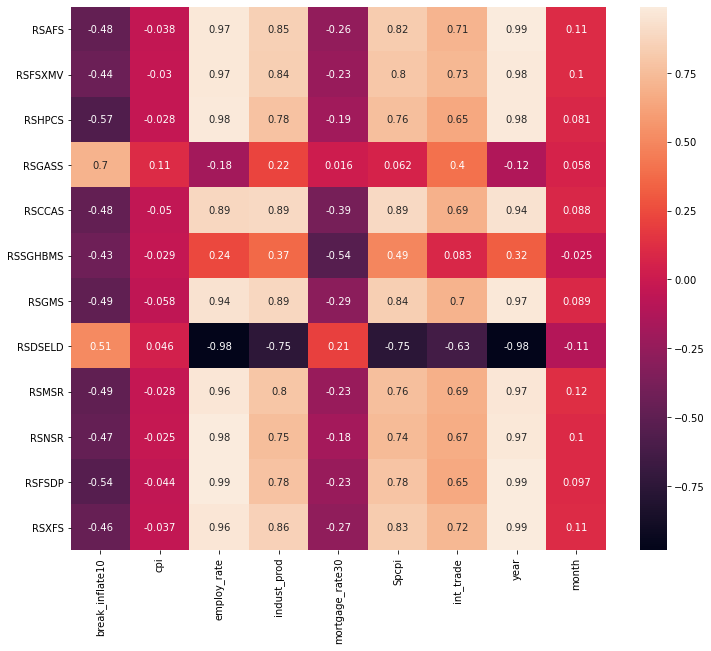

In [8]:
#Consider a heatmap of the data to see which sales and indicators have high correlation
plt.figure(figsize=(12,10))
sns.heatmap(df_adj.corr().iloc[:12,12:],annot=True)

## Feedforward Neural Network

We begin by running a standard feedforward neural network on each sales data without any indicators.  Later we will include indicators to see which improve the losses and predictions.

In particular, the loss we consider is the percentage error of the neural network relative to the standard deviation of the sales.  The closer the percentage error is to 100, the better the network performed.  On the other hand, if the error is close to 0, or worse, negative, than the network is not performing as well.

In [33]:
def neural_net(department,econ_ind=[]):
    Y = df_adj[department] 
    x_temp=['year','month']+econ_ind
    X = df_adj[x_temp]
   
    #Split train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, shuffle=True,random_state=100)
    
    
    #Count features for modelization
    X_num_columns= len(X.columns)

   
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim = X_num_columns))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='linear'))
    # don't ever put dropout layer in the output layer
    # don't dropout 

    #model.add(Dropout(0.2))

    # model.add(Dense(30,
    #               activation='relu'))
    # model.add(Dropout(0.2))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=128, batch_size=16)

    loss = model.evaluate(X_test, y_test)
    # relative error 
    result=(df_adj[department].std()-np.sqrt(loss))/df_adj[department].std()*100
    return result

In [34]:
sales=list(df_adj.columns[1:13])
sales

['RSAFS',
 'RSFSXMV',
 'RSHPCS',
 'RSGASS',
 'RSCCAS',
 'RSSGHBMS',
 'RSGMS',
 'RSDSELD',
 'RSMSR',
 'RSNSR',
 'RSFSDP',
 'RSXFS']

In [35]:
loss=np.zeros(len(sales))
for i, department in enumerate(sales):
    temp = neural_net(department)
    loss[i]=temp


Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 194492547072.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 194121285632.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 193756921856.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 193455783936.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 193141456896.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 192742408192.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 192156876800.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 191686819840.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 190967578624.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 190130176000.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 189394583552.0000
Epoch 12/128
6/6 [=

6/6 [==============================] - 0s 3ms/step - loss: 5117429248.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 5138689536.0000
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 4762539520.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 5814751744.0000
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 5751291392.0000
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 5049348608.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 5583857152.0000
Epoch 100/128
6/6 [==============================] - 0s 5ms/step - loss: 5443799040.0000
Epoch 101/128
6/6 [==============================] - 0s 4ms/step - loss: 6965552640.0000
Epoch 102/128
6/6 [==============================] - 0s 4ms/step - loss: 4605196800.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 4768022528.0000
Epoch 104/128
6/6 [======================

6/6 [==============================] - 0s 3ms/step - loss: 2524356864.0000
Epoch 57/128
6/6 [==============================] - 0s 3ms/step - loss: 3761471744.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 2418346240.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 3635008256.0000
Epoch 60/128
6/6 [==============================] - 0s 3ms/step - loss: 3383297280.0000
Epoch 61/128
6/6 [==============================] - 0s 3ms/step - loss: 2387223296.0000
Epoch 62/128
6/6 [==============================] - 0s 3ms/step - loss: 2140611200.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 3336505344.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 3174720768.0000
Epoch 65/128
6/6 [==============================] - 0s 3ms/step - loss: 2424746240.0000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 2526743808.0000
Epoch 67/128
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 13253749.0000
Epoch 21/128
6/6 [==============================] - 0s 3ms/step - loss: 12074747.0000
Epoch 22/128
6/6 [==============================] - 0s 3ms/step - loss: 13407572.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 14693912.0000
Epoch 24/128
6/6 [==============================] - 0s 3ms/step - loss: 14273708.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/step - loss: 11844312.0000
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 11374973.0000
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 11474199.0000
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 10671045.0000
Epoch 29/128
6/6 [==============================] - 0s 1ms/step - loss: 11289227.0000
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 12511795.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 4ms/step - loss: 14062920.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 9561030.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 14486888.0000
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 12838517.0000
Epoch 119/128
6/6 [==============================] - 0s 3ms/step - loss: 12935751.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 13789907.0000
Epoch 121/128
6/6 [==============================] - 0s 3ms/step - loss: 13179508.0000
Epoch 122/128
6/6 [==============================] - 0s 1ms/step - loss: 9595195.0000
Epoch 123/128
6/6 [==============================] - 0s 3ms/step - loss: 12412873.0000
Epoch 124/128
6/6 [==============================] - 0s 3ms/step - loss: 10398685.0000
Epoch 125/128
6/6 [==============================] - 0s 4ms/step - loss: 15970449.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms

6/6 [==============================] - 0s 2ms/step - loss: 32373950.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 29402728.0000
Epoch 83/128
6/6 [==============================] - 0s 3ms/step - loss: 33031126.0000
Epoch 84/128
6/6 [==============================] - 0s 3ms/step - loss: 37285508.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 35913052.0000
Epoch 86/128
6/6 [==============================] - 0s 3ms/step - loss: 31158094.0000
Epoch 87/128
6/6 [==============================] - 0s 2ms/step - loss: 33077218.0000
Epoch 88/128
6/6 [==============================] - 0s 2ms/step - loss: 38787244.0000
Epoch 89/128
6/6 [==============================] - 0s 3ms/step - loss: 32575344.0000
Epoch 90/128
6/6 [==============================] - 0s 4ms/step - loss: 32617144.0000
Epoch 91/128
6/6 [==============================] - 0s 3ms/step - loss: 32787430.0000
Epoch 92/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 10581003.0000
Epoch 48/128
6/6 [==============================] - 0s 3ms/step - loss: 8520897.0000
Epoch 49/128
6/6 [==============================] - 0s 3ms/step - loss: 7605473.5000
Epoch 50/128
6/6 [==============================] - 0s 3ms/step - loss: 8971955.0000
Epoch 51/128
6/6 [==============================] - 0s 3ms/step - loss: 10446477.0000
Epoch 52/128
6/6 [==============================] - 0s 2ms/step - loss: 6355952.0000
Epoch 53/128
6/6 [==============================] - 0s 2ms/step - loss: 11052967.0000
Epoch 54/128
6/6 [==============================] - 0s 3ms/step - loss: 7271085.5000
Epoch 55/128
6/6 [==============================] - 0s 2ms/step - loss: 8033919.5000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 7878016.0000
Epoch 57/128
6/6 [==============================] - 0s 3ms/step - loss: 8140573.5000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 795

6/6 [==============================] - 0s 3ms/step - loss: 854298.7500
Epoch 15/128
6/6 [==============================] - 0s 3ms/step - loss: 783000.4375
Epoch 16/128
6/6 [==============================] - 0s 4ms/step - loss: 820695.6875
Epoch 17/128
6/6 [==============================] - 0s 2ms/step - loss: 764083.6875
Epoch 18/128
6/6 [==============================] - 0s 3ms/step - loss: 803654.9375
Epoch 19/128
6/6 [==============================] - 0s 3ms/step - loss: 754388.6875
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 668745.3750
Epoch 21/128
6/6 [==============================] - 0s 3ms/step - loss: 822762.1875
Epoch 22/128
6/6 [==============================] - 0s 3ms/step - loss: 843276.0625
Epoch 23/128
6/6 [==============================] - 0s 3ms/step - loss: 884979.8125
Epoch 24/128
6/6 [==============================] - 0s 3ms/step - loss: 652726.7500
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 993370.0000
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 545060.3125
Epoch 112/128
6/6 [==============================] - 0s 3ms/step - loss: 875067.9375
Epoch 113/128
6/6 [==============================] - 0s 4ms/step - loss: 810679.2500
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 633758.3125
Epoch 115/128
6/6 [==============================] - 0s 3ms/step - loss: 749160.9375
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 814587.2500
Epoch 117/128
6/6 [==============================] - 0s 3ms/step - loss: 771289.5625
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 695072.5625
Epoch 119/128
6/6 [==============================] - 0s 3ms/step - loss: 825513.2500
Epoch 120/128
6/6 [==============================] - 0s 3ms/step - loss: 492014.7812
Epoch 121/128
6/6 [==============================] - 0s 3ms/step - loss: 710759.0625
Epoch 122/128
6/6 [==============================] - 0s 3ms/step - loss: 774955

6/6 [==============================] - 0s 4ms/step - loss: 60352844.0000
Epoch 78/128
6/6 [==============================] - 0s 3ms/step - loss: 43441100.0000
Epoch 79/128
6/6 [==============================] - 0s 3ms/step - loss: 45843308.0000
Epoch 80/128
6/6 [==============================] - 0s 4ms/step - loss: 47759532.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 46858004.0000
Epoch 82/128
6/6 [==============================] - 0s 4ms/step - loss: 41539728.0000
Epoch 83/128
6/6 [==============================] - 0s 3ms/step - loss: 62221108.0000
Epoch 84/128
6/6 [==============================] - 0s 3ms/step - loss: 57701872.0000
Epoch 85/128
6/6 [==============================] - 0s 3ms/step - loss: 82071560.0000
Epoch 86/128
6/6 [==============================] - 0s 3ms/step - loss: 51165636.0000
Epoch 87/128
6/6 [==============================] - 0s 3ms/step - loss: 60949424.0000
Epoch 88/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 5252320.0000
Epoch 44/128
6/6 [==============================] - 0s 3ms/step - loss: 5147272.5000
Epoch 45/128
6/6 [==============================] - 0s 3ms/step - loss: 5928938.5000
Epoch 46/128
6/6 [==============================] - 0s 3ms/step - loss: 5844696.5000
Epoch 47/128
6/6 [==============================] - 0s 3ms/step - loss: 5758095.5000
Epoch 48/128
6/6 [==============================] - 0s 3ms/step - loss: 4828640.5000
Epoch 49/128
6/6 [==============================] - 0s 3ms/step - loss: 5249928.0000
Epoch 50/128
6/6 [==============================] - 0s 3ms/step - loss: 6235084.5000
Epoch 51/128
6/6 [==============================] - 0s 3ms/step - loss: 5438610.0000
Epoch 52/128
6/6 [==============================] - 0s 3ms/step - loss: 5967908.0000
Epoch 53/128
6/6 [==============================] - 0s 3ms/step - loss: 4786786.0000
Epoch 54/128
6/6 [==============================] - 0s 3ms/step - loss: 411992

6/6 [==============================] - 0s 2ms/step - loss: 41715232.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 35019780.0000
Epoch 12/128
6/6 [==============================] - 0s 3ms/step - loss: 27972736.0000
Epoch 13/128
6/6 [==============================] - 0s 3ms/step - loss: 19190698.0000
Epoch 14/128
6/6 [==============================] - 0s 2ms/step - loss: 12590401.0000
Epoch 15/128
6/6 [==============================] - 0s 3ms/step - loss: 8667440.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 4988469.0000
Epoch 17/128
6/6 [==============================] - 0s 3ms/step - loss: 2507916.5000
Epoch 18/128
6/6 [==============================] - 0s 4ms/step - loss: 1863144.8750
Epoch 19/128
6/6 [==============================] - 0s 3ms/step - loss: 2573824.2500
Epoch 20/128
6/6 [==============================] - 0s 3ms/step - loss: 2857222.7500
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 2

6/6 [==============================] - 0s 3ms/step - loss: 2003307.1250
Epoch 107/128
6/6 [==============================] - 0s 4ms/step - loss: 2075077.3750
Epoch 108/128
6/6 [==============================] - 0s 3ms/step - loss: 2288996.7500
Epoch 109/128
6/6 [==============================] - 0s 3ms/step - loss: 2457756.0000
Epoch 110/128
6/6 [==============================] - 0s 4ms/step - loss: 1892679.6250
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 1755480.6250
Epoch 112/128
6/6 [==============================] - 0s 3ms/step - loss: 1801032.1250
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 2179291.5000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 1653350.5000
Epoch 115/128
6/6 [==============================] - 0s 1ms/step - loss: 1809924.6250
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 1803932.3750
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 128159336.0000
Epoch 72/128
6/6 [==============================] - 0s 3ms/step - loss: 147161584.0000
Epoch 73/128
6/6 [==============================] - 0s 3ms/step - loss: 134306608.0000
Epoch 74/128
6/6 [==============================] - 0s 3ms/step - loss: 141531888.0000
Epoch 75/128
6/6 [==============================] - 0s 3ms/step - loss: 141799520.0000
Epoch 76/128
6/6 [==============================] - 0s 3ms/step - loss: 139082288.0000
Epoch 77/128
6/6 [==============================] - 0s 3ms/step - loss: 138121600.0000
Epoch 78/128
6/6 [==============================] - 0s 3ms/step - loss: 133952920.0000
Epoch 79/128
6/6 [==============================] - 0s 4ms/step - loss: 153245008.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 152444064.0000
Epoch 81/128
6/6 [==============================] - 0s 3ms/step - loss: 144774320.0000
Epoch 82/128
6/6 [==============================] - 0s 2

Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 116248416.0000
Epoch 37/128
6/6 [==============================] - 0s 3ms/step - loss: 105158584.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 121784072.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 108926464.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - loss: 114257576.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 140148912.0000
Epoch 42/128
6/6 [==============================] - 0s 3ms/step - loss: 110801152.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 107387096.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 110285056.0000
Epoch 45/128
6/6 [==============================] - 0s 3ms/step - loss: 113979144.0000
Epoch 46/128
6/6 [==============================] - 0s 3ms/step - loss: 100491104.0000
Epoch 47/128
6/6 [=========================

6/6 [==============================] - 1s 2ms/step - loss: 151629627392.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 151287513088.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 150923509760.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss: 150518808576.0000
Epoch 5/128
6/6 [==============================] - 0s 1ms/step - loss: 150116384768.0000
Epoch 6/128
6/6 [==============================] - 0s 3ms/step - loss: 149567520768.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 148992933888.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 148282736640.0000
Epoch 9/128
6/6 [==============================] - 0s 3ms/step - loss: 147503792128.0000
Epoch 10/128
6/6 [==============================] - 0s 3ms/step - loss: 146534449152.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step - loss: 145415979008.0000
Epoch 12/128
6/6 [=============

6/6 [==============================] - 0s 3ms/step - loss: 3310115072.0000
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 2890875136.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 3224862976.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 4138344192.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 2808380416.0000
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 2496802048.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 2441778944.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 3976735488.0000
Epoch 101/128
6/6 [==============================] - 0s 4ms/step - loss: 2957991680.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 4127974656.0000
Epoch 103/128
6/6 [==============================] - 0s 1ms/step - loss: 3876482304.0000
Epoch 104/128
6/6 [======================

In [36]:
df_loss=pd.DataFrame(data = loss, columns=['no_indic'])
df_loss['sales']=sales
df_loss

,no_indic,sales
0,12.572997,RSAFS
1,12.294184,RSFSXMV
2,3.827991,RSHPCS
3,-5.210257,RSGASS
4,22.989531,RSCCAS
5,10.385218,RSSGHBMS
6,11.375701,RSGMS
7,3.464801,RSDSELD
8,9.638603,RSMSR
9,6.245095,RSNSR


In [ ]:
df_loss.sort_values('no_indic')

Now we run this with the indicators to see which ones improve the loss

In [37]:
indicators_list=list(df_adj.columns[13:-2])

In [ ]:
neural_net('RSAFS',['cpi'])

In [38]:
# In order for the international trade to be computed, we scale it down first
df_adj['int_trade']=df_adj['int_trade'].div(10**8)

<ipython-input-38-febf768b7536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adj['int_trade']=df_adj['int_trade'].div(10**8)


In [ ]:
df_adj['int_trade']

In [39]:
loss1=np.zeros((len(sales),len(indicators_list)))
for i, department in enumerate(sales):
    for j, indicator in enumerate(indicators_list):
        temp = neural_net(department,[indicator])
        loss1[i,j]=temp


Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 195003269120.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 194545451008.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 194118303744.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 193735344128.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 193387184128.0000
Epoch 6/128
6/6 [==============================] - 0s 3ms/step - loss: 192982728704.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 192529694720.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 192007127040.0000
Epoch 9/128
6/6 [==============================] - 0s 3ms/step - loss: 191426281472.0000
Epoch 10/128
6/6 [==============================] - 0s 3ms/step - loss: 190707974144.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step - loss: 189770547200.0000
Epoch 12/128
6/6 [=

6/6 [==============================] - 0s 3ms/step - loss: 4039557120.0000
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 4391613440.0000
Epoch 95/128
6/6 [==============================] - 0s 4ms/step - loss: 5670906880.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 4956893696.0000
Epoch 97/128
6/6 [==============================] - 0s 4ms/step - loss: 4954226176.0000
Epoch 98/128
6/6 [==============================] - 0s 4ms/step - loss: 5149357568.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 4844810752.0000
Epoch 100/128
6/6 [==============================] - 0s 3ms/step - loss: 4920739328.0000
Epoch 101/128
6/6 [==============================] - 0s 4ms/step - loss: 5171405312.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 5953135104.0000
Epoch 103/128
6/6 [==============================] - 0s 4ms/step - loss: 5253540352.0000
Epoch 104/128
6/6 [======================

6/6 [==============================] - 0s 3ms/step - loss: 4689734144.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 3973324032.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 3501062912.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 4181519616.0000
Epoch 60/128
6/6 [==============================] - 0s 3ms/step - loss: 5069635584.0000
Epoch 61/128
6/6 [==============================] - 0s 4ms/step - loss: 3279130624.0000
Epoch 62/128
6/6 [==============================] - 0s 3ms/step - loss: 3561900288.0000
Epoch 63/128
6/6 [==============================] - 0s 3ms/step - loss: 3808311296.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 2915124224.0000
Epoch 65/128
6/6 [==============================] - 0s 3ms/step - loss: 3918102784.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 4364480000.0000
Epoch 67/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 176864280576.0000
Epoch 20/128
6/6 [==============================] - 0s 3ms/step - loss: 174102872064.0000
Epoch 21/128
6/6 [==============================] - 0s 3ms/step - loss: 170652614656.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 167565082624.0000
Epoch 23/128
6/6 [==============================] - 0s 3ms/step - loss: 163334012928.0000
Epoch 24/128
6/6 [==============================] - 0s 3ms/step - loss: 159735726080.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 155419525120.0000
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 150969794560.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 145749082112.0000
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 140726370304.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 136256643072.0000
Epoch 30/128
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 6306537984.0000
Epoch 112/128
6/6 [==============================] - 0s 4ms/step - loss: 4831447552.0000
Epoch 113/128
6/6 [==============================] - 0s 3ms/step - loss: 4937243648.0000
Epoch 114/128
6/6 [==============================] - 0s 4ms/step - loss: 5822703104.0000
Epoch 115/128
6/6 [==============================] - 0s 4ms/step - loss: 5769763328.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 4683638272.0000
Epoch 117/128
6/6 [==============================] - 0s 3ms/step - loss: 4147005440.0000
Epoch 118/128
6/6 [==============================] - 0s 4ms/step - loss: 5559944192.0000
Epoch 119/128
6/6 [==============================] - 0s 3ms/step - loss: 4268011264.0000
Epoch 120/128
6/6 [==============================] - 0s 3ms/step - loss: 5115996672.0000
Epoch 121/128
6/6 [==============================] - 0s 4ms/step - loss: 4678404096.0000
Epoch 122/128
6/6 [================

6/6 [==============================] - 0s 4ms/step - loss: 4484104192.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 3640358912.0000
Epoch 76/128
6/6 [==============================] - 0s 3ms/step - loss: 3864690688.0000
Epoch 77/128
6/6 [==============================] - 0s 4ms/step - loss: 4619240960.0000
Epoch 78/128
6/6 [==============================] - 0s 4ms/step - loss: 4305660416.0000
Epoch 79/128
6/6 [==============================] - 0s 3ms/step - loss: 4694076928.0000
Epoch 80/128
6/6 [==============================] - 0s 4ms/step - loss: 4236615680.0000
Epoch 81/128
6/6 [==============================] - 0s 4ms/step - loss: 4548931072.0000
Epoch 82/128
6/6 [==============================] - 0s 3ms/step - loss: 4832302592.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 4335507456.0000
Epoch 84/128
6/6 [==============================] - 0s 3ms/step - loss: 4687196672.0000
Epoch 85/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 87061110784.0000
Epoch 38/128
6/6 [==============================] - 0s 3ms/step - loss: 78614716416.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 72445485056.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - loss: 66768785408.0000
Epoch 41/128
6/6 [==============================] - 0s 3ms/step - loss: 59040710656.0000
Epoch 42/128
6/6 [==============================] - 0s 3ms/step - loss: 55331680256.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 48122494976.0000
Epoch 44/128
6/6 [==============================] - 0s 3ms/step - loss: 41973882880.0000
Epoch 45/128
6/6 [==============================] - 0s 4ms/step - loss: 37545590784.0000
Epoch 46/128
6/6 [==============================] - 0s 3ms/step - loss: 31501158400.0000
Epoch 47/128
6/6 [==============================] - 0s 3ms/step - loss: 28252643328.0000
Epoch 48/128
6/6 [================

1/1 [==============================] - 0s 179ms/step - loss: 1778434048.0000
Epoch 1/128
6/6 [==============================] - 1s 3ms/step - loss: 194861678592.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 194588442624.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 194350039040.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss: 194113372160.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 193869250560.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 193618640896.0000
Epoch 7/128
6/6 [==============================] - 0s 3ms/step - loss: 193291862016.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 192889274368.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 192474644480.0000
Epoch 10/128
6/6 [==============================] - 0s 3ms/step - loss: 191962546176.0000
Epoch 11/128
6/6 [==============

6/6 [==============================] - 0s 3ms/step - loss: 5529374208.0000
Epoch 93/128
6/6 [==============================] - 0s 3ms/step - loss: 4636424704.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 6325039104.0000
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 5662882304.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 5340503552.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 5708666368.0000
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 7302039040.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 5415336448.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 4213524224.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 6293445120.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 5384263680.0000
Epoch 103/128
6/6 [=======================

6/6 [==============================] - 0s 2ms/step - loss: 4223705856.0000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 3861125120.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 3201435904.0000
Epoch 58/128
6/6 [==============================] - 0s 1ms/step - loss: 4964545536.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 4442945536.0000
Epoch 60/128
6/6 [==============================] - 0s 4ms/step - loss: 4037692160.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 4427161088.0000
Epoch 62/128
6/6 [==============================] - 0s 3ms/step - loss: 4401821184.0000
Epoch 63/128
6/6 [==============================] - 0s 3ms/step - loss: 3807959040.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 5089256960.0000
Epoch 65/128
6/6 [==============================] - 0s 3ms/step - loss: 3179102976.0000
Epoch 66/128
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 111856943104.0000
Epoch 19/128
6/6 [==============================] - 0s 3ms/step - loss: 109290053632.0000
Epoch 20/128
6/6 [==============================] - 0s 3ms/step - loss: 107353899008.0000
Epoch 21/128
6/6 [==============================] - 0s 3ms/step - loss: 104452415488.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 101711355904.0000
Epoch 23/128
6/6 [==============================] - 0s 3ms/step - loss: 98690883584.0000
Epoch 24/128
6/6 [==============================] - 0s 3ms/step - loss: 95718432768.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/step - loss: 91987582976.0000
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 88755298304.0000
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 83964141568.0000
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 81223450624.0000
Epoch 29/128
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 2456811264.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 2619845632.0000
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - loss: 2295149312.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 2630741760.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 2725246720.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 3208283392.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 2833469696.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 2907508480.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 2290690304.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 2929208064.0000
Epoch 120/128
6/6 [==============================] - 0s 1ms/step - loss: 3638393856.0000
Epoch 121/128
6/6 [================

6/6 [==============================] - 0s 2ms/step - loss: 2728470272.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 2931256064.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 2519674624.0000
Epoch 76/128
6/6 [==============================] - 0s 3ms/step - loss: 2786342144.0000
Epoch 77/128
6/6 [==============================] - 0s 3ms/step - loss: 3156884480.0000
Epoch 78/128
6/6 [==============================] - 0s 3ms/step - loss: 2842453760.0000
Epoch 79/128
6/6 [==============================] - 0s 3ms/step - loss: 3631758592.0000
Epoch 80/128
6/6 [==============================] - 0s 3ms/step - loss: 3219495168.0000
Epoch 81/128
6/6 [==============================] - 0s 3ms/step - loss: 2260862208.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 3040533760.0000
Epoch 83/128
6/6 [==============================] - 0s 3ms/step - loss: 2656970752.0000
Epoch 84/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 54490087424.0000
Epoch 37/128
6/6 [==============================] - 0s 3ms/step - loss: 49188728832.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 46511882240.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 40983846912.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - loss: 36623134720.0000
Epoch 41/128
6/6 [==============================] - 0s 3ms/step - loss: 33391503360.0000
Epoch 42/128
6/6 [==============================] - 0s 3ms/step - loss: 29960652800.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 26373965824.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 21558267904.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 20806584320.0000
Epoch 46/128
6/6 [==============================] - 0s 4ms/step - loss: 16847601664.0000
Epoch 47/128
6/6 [================

1/1 [==============================] - 0s 175ms/step - loss: 936801280.0000
Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 125472079872.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 125225246720.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 124975374336.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss: 124708593664.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 124441788416.0000
Epoch 6/128
6/6 [==============================] - 0s 3ms/step - loss: 124102205440.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 123695587328.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 123171758080.0000
Epoch 9/128
6/6 [==============================] - 0s 3ms/step - loss: 122649862144.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 121871507456.0000
Epoch 11/128
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 3059134464.0000
Epoch 92/128
6/6 [==============================] - 0s 3ms/step - loss: 2655826944.0000
Epoch 93/128
6/6 [==============================] - 0s 3ms/step - loss: 2886981632.0000
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 2316760320.0000
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 2397683712.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 3068538880.0000
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 2492963584.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 2391379456.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 2589804800.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 2204284928.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 2294979328.0000
Epoch 102/128
6/6 [========================

6/6 [==============================] - 0s 3ms/step - loss: 2514894592.0000
Epoch 55/128
6/6 [==============================] - 0s 3ms/step - loss: 2397566976.0000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 2310073344.0000
Epoch 57/128
6/6 [==============================] - 0s 3ms/step - loss: 2196810496.0000
Epoch 58/128
6/6 [==============================] - 0s 3ms/step - loss: 2603928320.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 3370295296.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 2685472512.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 2473640960.0000
Epoch 62/128
6/6 [==============================] - 0s 4ms/step - loss: 2420039936.0000
Epoch 63/128
6/6 [==============================] - 0s 4ms/step - loss: 2480408064.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 2440223488.0000
Epoch 65/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 119393017856.0000
Epoch 18/128
6/6 [==============================] - 0s 2ms/step - loss: 118251102208.0000
Epoch 19/128
6/6 [==============================] - 0s 2ms/step - loss: 116853448704.0000
Epoch 20/128
6/6 [==============================] - 0s 1ms/step - loss: 115413385216.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 114037612544.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 112173187072.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 110525808640.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 108855959552.0000
Epoch 25/128
6/6 [==============================] - 0s 1ms/step - loss: 106477543424.0000
Epoch 26/128
6/6 [==============================] - 0s 1ms/step - loss: 104080367616.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 101139783680.0000
Epoch 28/128
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 4553126400.0000
Epoch 110/128
6/6 [==============================] - 0s 3ms/step - loss: 3336916992.0000
Epoch 111/128
6/6 [==============================] - 0s 3ms/step - loss: 3309496576.0000
Epoch 112/128
6/6 [==============================] - 0s 3ms/step - loss: 4244311296.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 3872256256.0000
Epoch 114/128
6/6 [==============================] - 0s 3ms/step - loss: 3867845376.0000
Epoch 115/128
6/6 [==============================] - 0s 3ms/step - loss: 3811502080.0000
Epoch 116/128
6/6 [==============================] - 0s 4ms/step - loss: 3958929408.0000
Epoch 117/128
6/6 [==============================] - 0s 5ms/step - loss: 3951104000.0000
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 3298247424.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 3510152448.0000
Epoch 120/128
6/6 [================

6/6 [==============================] - 0s 3ms/step - loss: 2749585408.0000
Epoch 73/128
6/6 [==============================] - 0s 3ms/step - loss: 2765472768.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 1713212032.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 2835874560.0000
Epoch 76/128
6/6 [==============================] - 0s 3ms/step - loss: 2924436224.0000
Epoch 77/128
6/6 [==============================] - 0s 3ms/step - loss: 2611751424.0000
Epoch 78/128
6/6 [==============================] - 0s 4ms/step - loss: 2825458688.0000
Epoch 79/128
6/6 [==============================] - 0s 3ms/step - loss: 2297712896.0000
Epoch 80/128
6/6 [==============================] - 0s 3ms/step - loss: 2729558016.0000
Epoch 81/128
6/6 [==============================] - 0s 3ms/step - loss: 2662163200.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 2749678592.0000
Epoch 83/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 18358136.0000
Epoch 37/128
6/6 [==============================] - 0s 1ms/step - loss: 11578952.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 18569096.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 14556699.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 17950928.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 18020046.0000
Epoch 42/128
6/6 [==============================] - 0s 4ms/step - loss: 13217013.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 19286310.0000
Epoch 44/128
6/6 [==============================] - 0s 1ms/step - loss: 14900041.0000
Epoch 45/128
6/6 [==============================] - 0s 3ms/step - loss: 12900075.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 14940381.0000
Epoch 47/128
6/6 [==============================] - 0s 1ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 584848128.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 565484160.0000
Epoch 4/128
6/6 [==============================] - 0s 4ms/step - loss: 542033408.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 519581952.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 492843360.0000
Epoch 7/128
6/6 [==============================] - 0s 4ms/step - loss: 464221216.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 427335680.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 392536960.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 353147040.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 313767840.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 261885632.0000
Epoch 13/128
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 3ms/step - loss: 15062700.0000
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 11179287.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 16074436.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 13984871.0000
Epoch 101/128
6/6 [==============================] - 0s 3ms/step - loss: 12799529.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 14614224.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 12821864.0000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 13737127.0000
Epoch 105/128
6/6 [==============================] - 0s 3ms/step - loss: 15711895.0000
Epoch 106/128
6/6 [==============================] - 0s 3ms/step - loss: 12723528.0000
Epoch 107/128
6/6 [==============================] - 0s 4ms/step - loss: 12467692.0000
Epoch 108/128
6/6 [==============================] - 0s 3ms

6/6 [==============================] - 0s 3ms/step - loss: 16803630.0000
Epoch 64/128
6/6 [==============================] - 0s 4ms/step - loss: 21191878.0000
Epoch 65/128
6/6 [==============================] - 0s 4ms/step - loss: 20237574.0000
Epoch 66/128
6/6 [==============================] - 0s 4ms/step - loss: 16559060.0000
Epoch 67/128
6/6 [==============================] - 0s 3ms/step - loss: 17612942.0000
Epoch 68/128
6/6 [==============================] - 0s 3ms/step - loss: 17799324.0000
Epoch 69/128
6/6 [==============================] - 0s 4ms/step - loss: 17169274.0000
Epoch 70/128
6/6 [==============================] - 0s 4ms/step - loss: 16441432.0000
Epoch 71/128
6/6 [==============================] - 0s 4ms/step - loss: 22425202.0000
Epoch 72/128
6/6 [==============================] - 0s 4ms/step - loss: 22088356.0000
Epoch 73/128
6/6 [==============================] - 0s 4ms/step - loss: 16052547.0000
Epoch 74/128
6/6 [==============================] - 0s 4ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 15223431.0000
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 15917376.0000
Epoch 31/128
6/6 [==============================] - 0s 3ms/step - loss: 16348963.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 15027844.0000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 14813520.0000
Epoch 34/128
6/6 [==============================] - 0s 3ms/step - loss: 18476760.0000
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 20593122.0000
Epoch 36/128
6/6 [==============================] - 0s 3ms/step - loss: 15352251.0000
Epoch 37/128
6/6 [==============================] - 0s 4ms/step - loss: 16106941.0000
Epoch 38/128
6/6 [==============================] - 0s 4ms/step - loss: 15328555.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 19049764.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 13151597.0000
Epoch 125/128
6/6 [==============================] - 0s 3ms/step - loss: 19138586.0000
Epoch 126/128
6/6 [==============================] - 0s 3ms/step - loss: 17743744.0000
Epoch 127/128
6/6 [==============================] - 0s 3ms/step - loss: 17778072.0000
Epoch 128/128
1/1 [==============================] - 0s 189ms/step - loss: 5238396.5000
Epoch 1/128
6/6 [==============================] - 1s 3ms/step - loss: 645330496.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 621459392.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 605169984.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss: 590231040.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 572064256.0000
Epoch 6/128
6/6 [==============================] - 0s 3ms/step - loss: 556134656.0000
Epoch 7/128
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 3ms/step - loss: 17283864.0000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 15122872.0000
Epoch 92/128
6/6 [==============================] - 0s 3ms/step - loss: 21429750.0000
Epoch 93/128
6/6 [==============================] - 0s 4ms/step - loss: 11747131.0000
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 17114062.0000
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 12685352.0000
Epoch 96/128
6/6 [==============================] - 0s 4ms/step - loss: 13102645.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 11437432.0000
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 16033571.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 19971666.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 13394263.0000
Epoch 101/128
6/6 [==============================] - 0s 3ms/step -

6/6 [==============================] - 0s 3ms/step - loss: 13878951.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 16390620.0000
Epoch 58/128
6/6 [==============================] - 0s 3ms/step - loss: 14308724.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 16774000.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 14522003.0000
Epoch 61/128
6/6 [==============================] - 0s 3ms/step - loss: 18097960.0000
Epoch 62/128
6/6 [==============================] - 0s 3ms/step - loss: 18270822.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 13939413.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 13246504.0000
Epoch 65/128
6/6 [==============================] - 0s 3ms/step - loss: 15917597.0000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 14661351.0000
Epoch 67/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 4ms/step - loss: 12567944.0000
Epoch 23/128
6/6 [==============================] - 0s 3ms/step - loss: 11488155.0000
Epoch 24/128
6/6 [==============================] - 0s 5ms/step - loss: 12526928.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/step - loss: 12519703.0000
Epoch 26/128
6/6 [==============================] - 0s 4ms/step - loss: 14660596.0000
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 11134665.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 13317921.0000
Epoch 29/128
6/6 [==============================] - 0s 3ms/step - loss: 12233465.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 9605336.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 12390547.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 12703341.0000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - lo

6/6 [==============================] - 0s 3ms/step - loss: 11630096.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 15878528.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 12399045.0000
Epoch 120/128
6/6 [==============================] - 0s 3ms/step - loss: 11582005.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 11726785.0000
Epoch 122/128
6/6 [==============================] - 0s 3ms/step - loss: 12961587.0000
Epoch 123/128
6/6 [==============================] - 0s 3ms/step - loss: 11784623.0000
Epoch 124/128
6/6 [==============================] - 0s 3ms/step - loss: 13433317.0000
Epoch 125/128
6/6 [==============================] - 0s 3ms/step - loss: 15109537.0000
Epoch 126/128
6/6 [==============================] - 0s 3ms/step - loss: 11417160.0000
Epoch 127/128
6/6 [==============================] - 0s 4ms/step - loss: 12087907.0000
Epoch 128/128
1/1 [==============================] - 0s 1

6/6 [==============================] - 0s 3ms/step - loss: 34600468.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 37537684.0000
Epoch 85/128
6/6 [==============================] - 0s 3ms/step - loss: 38590940.0000
Epoch 86/128
6/6 [==============================] - 0s 3ms/step - loss: 26228120.0000
Epoch 87/128
6/6 [==============================] - 0s 2ms/step - loss: 40736716.0000
Epoch 88/128
6/6 [==============================] - 0s 4ms/step - loss: 30991758.0000
Epoch 89/128
6/6 [==============================] - 0s 1ms/step - loss: 31853304.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 43680016.0000
Epoch 91/128
6/6 [==============================] - 0s 3ms/step - loss: 40216620.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 37173504.0000
Epoch 93/128
6/6 [==============================] - 0s 3ms/step - loss: 52860876.0000
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - l

Epoch 49/128
6/6 [==============================] - 0s 3ms/step - loss: 22736526.0000
Epoch 50/128
6/6 [==============================] - 0s 2ms/step - loss: 37144600.0000
Epoch 51/128
6/6 [==============================] - 0s 3ms/step - loss: 25874366.0000
Epoch 52/128
6/6 [==============================] - 0s 3ms/step - loss: 28607434.0000
Epoch 53/128
6/6 [==============================] - 0s 2ms/step - loss: 28969942.0000
Epoch 54/128
6/6 [==============================] - 0s 3ms/step - loss: 38460544.0000
Epoch 55/128
6/6 [==============================] - 0s 2ms/step - loss: 31611750.0000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 25740566.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 23582746.0000
Epoch 58/128
6/6 [==============================] - 0s 3ms/step - loss: 27348394.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 30010130.0000
Epoch 60/128
6/6 [==============================] - 0s

6/6 [==============================] - 0s 2ms/step - loss: 852193984.0000
Epoch 15/128
6/6 [==============================] - 0s 3ms/step - loss: 742331392.0000
Epoch 16/128
6/6 [==============================] - 0s 3ms/step - loss: 661242240.0000
Epoch 17/128
6/6 [==============================] - 0s 3ms/step - loss: 537551616.0000
Epoch 18/128
6/6 [==============================] - 0s 3ms/step - loss: 411686240.0000
Epoch 19/128
6/6 [==============================] - 0s 4ms/step - loss: 295343584.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 245494864.0000
Epoch 21/128
6/6 [==============================] - 0s 4ms/step - loss: 158978864.0000
Epoch 22/128
6/6 [==============================] - 0s 3ms/step - loss: 97110152.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 78805632.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 61552780.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/

6/6 [==============================] - 0s 3ms/step - loss: 38014516.0000
Epoch 110/128
6/6 [==============================] - 0s 3ms/step - loss: 30889170.0000
Epoch 111/128
6/6 [==============================] - 0s 3ms/step - loss: 31071334.0000
Epoch 112/128
6/6 [==============================] - 0s 3ms/step - loss: 37610660.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 28129192.0000
Epoch 114/128
6/6 [==============================] - 0s 3ms/step - loss: 31285486.0000
Epoch 115/128
6/6 [==============================] - 0s 3ms/step - loss: 28756824.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 30828570.0000
Epoch 117/128
6/6 [==============================] - 0s 3ms/step - loss: 32018794.0000
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 33852644.0000
Epoch 119/128
6/6 [==============================] - 0s 3ms/step - loss: 36402284.0000
Epoch 120/128
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 2ms/step - loss: 32284800.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 34665500.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 33464338.0000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 32018528.0000
Epoch 79/128
6/6 [==============================] - 0s 3ms/step - loss: 32729194.0000
Epoch 80/128
6/6 [==============================] - 0s 3ms/step - loss: 33035520.0000
Epoch 81/128
6/6 [==============================] - 0s 4ms/step - loss: 34348776.0000
Epoch 82/128
6/6 [==============================] - 0s 3ms/step - loss: 29374582.0000
Epoch 83/128
6/6 [==============================] - 0s 3ms/step - loss: 32970234.0000
Epoch 84/128
6/6 [==============================] - 0s 3ms/step - loss: 37834560.0000
Epoch 85/128
6/6 [==============================] - 0s 3ms/step - loss: 36330532.0000
Epoch 86/128
6/6 [==============================] - 0s 3ms/step - l

Epoch 41/128
6/6 [==============================] - 0s 3ms/step - loss: 31715136.0000
Epoch 42/128
6/6 [==============================] - 0s 3ms/step - loss: 32059106.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 32297986.0000
Epoch 44/128
6/6 [==============================] - 0s 3ms/step - loss: 31104650.0000
Epoch 45/128
6/6 [==============================] - 0s 3ms/step - loss: 43887284.0000
Epoch 46/128
6/6 [==============================] - 0s 3ms/step - loss: 33286776.0000
Epoch 47/128
6/6 [==============================] - 0s 4ms/step - loss: 32379114.0000
Epoch 48/128
6/6 [==============================] - 0s 3ms/step - loss: 42294444.0000
Epoch 49/128
6/6 [==============================] - 0s 3ms/step - loss: 29505618.0000
Epoch 50/128
6/6 [==============================] - 0s 4ms/step - loss: 26660198.0000
Epoch 51/128
6/6 [==============================] - 0s 2ms/step - loss: 28000770.0000
Epoch 52/128
6/6 [==============================] - 0s

Epoch 7/128
6/6 [==============================] - 0s 3ms/step - loss: 1559090304.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 1510294144.0000
Epoch 9/128
6/6 [==============================] - 0s 3ms/step - loss: 1457979776.0000
Epoch 10/128
6/6 [==============================] - 0s 3ms/step - loss: 1397446016.0000
Epoch 11/128
6/6 [==============================] - 0s 1ms/step - loss: 1334308224.0000
Epoch 12/128
6/6 [==============================] - 0s 3ms/step - loss: 1250147456.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step - loss: 1171991680.0000
Epoch 14/128
6/6 [==============================] - 0s 1ms/step - loss: 1060291648.0000
Epoch 15/128
6/6 [==============================] - 0s 3ms/step - loss: 969321984.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 862596672.0000
Epoch 17/128
6/6 [==============================] - 0s 2ms/step - loss: 741342464.0000
Epoch 18/128
6/6 [====================

Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 46135504.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 40650212.0000
Epoch 104/128
6/6 [==============================] - 0s 1ms/step - loss: 40569588.0000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 38926324.0000
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss: 31720368.0000
Epoch 107/128
6/6 [==============================] - 0s 3ms/step - loss: 43303928.0000
Epoch 108/128
6/6 [==============================] - 0s 2ms/step - loss: 40643368.0000
Epoch 109/128
6/6 [==============================] - 0s 3ms/step - loss: 50703228.0000
Epoch 110/128
6/6 [==============================] - 0s 3ms/step - loss: 30513510.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 34188080.0000
Epoch 112/128
6/6 [==============================] - 0s 3ms/step - loss: 42784296.0000
Epoch 113/128
6/6 [========================

6/6 [==============================] - 0s 3ms/step - loss: 29064166.0000
Epoch 68/128
6/6 [==============================] - 0s 3ms/step - loss: 33526978.0000
Epoch 69/128
6/6 [==============================] - 0s 3ms/step - loss: 39285340.0000
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 28202392.0000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 27855694.0000
Epoch 72/128
6/6 [==============================] - 0s 3ms/step - loss: 30568912.0000
Epoch 73/128
6/6 [==============================] - 0s 2ms/step - loss: 33230150.0000
Epoch 74/128
6/6 [==============================] - 0s 4ms/step - loss: 38995084.0000
Epoch 75/128
6/6 [==============================] - 0s 3ms/step - loss: 36129752.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 36715116.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 36796676.0000
Epoch 78/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 4ms/step - loss: 8836323.0000
Epoch 34/128
6/6 [==============================] - 0s 4ms/step - loss: 9347355.0000
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 6831967.5000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 7625925.5000
Epoch 37/128
6/6 [==============================] - 0s 3ms/step - loss: 7148962.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 6235905.5000
Epoch 39/128
6/6 [==============================] - 0s 4ms/step - loss: 9465869.0000
Epoch 40/128
6/6 [==============================] - 0s 4ms/step - loss: 8651085.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 8004013.5000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 8004422.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 7784586.5000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 722586

1/1 [==============================] - 0s 189ms/step - loss: 1410949.0000
Epoch 1/128
6/6 [==============================] - 1s 1ms/step - loss: 421887072.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 405071840.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 391397728.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 378837760.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 363250464.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 349393568.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 328794912.0000
Epoch 8/128
6/6 [==============================] - 0s 4ms/step - loss: 314305184.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 289958304.0000
Epoch 10/128
6/6 [==============================] - 0s 3ms/step - loss: 262373840.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step -

6/6 [==============================] - 0s 2ms/step - loss: 6631880.0000
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 10805616.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 6807650.5000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 10302509.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 6667656.0000
Epoch 101/128
6/6 [==============================] - 0s 3ms/step - loss: 6606055.5000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 8414861.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 7598704.5000
Epoch 104/128
6/6 [==============================] - 0s 3ms/step - loss: 8754839.0000
Epoch 105/128
6/6 [==============================] - 0s 4ms/step - loss: 8220862.5000
Epoch 106/128
6/6 [==============================] - 0s 3ms/step - loss: 9254312.0000
Epoch 107/128
6/6 [==============================] - 0s 2ms/step - lo

Epoch 63/128
6/6 [==============================] - 0s 4ms/step - loss: 7529666.5000
Epoch 64/128
6/6 [==============================] - 0s 1ms/step - loss: 6892687.5000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 8447383.0000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 7509349.5000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 6123463.5000
Epoch 68/128
6/6 [==============================] - 0s 3ms/step - loss: 5975457.5000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 7456379.5000
Epoch 70/128
6/6 [==============================] - 0s 1ms/step - loss: 8116749.5000
Epoch 71/128
6/6 [==============================] - 0s 3ms/step - loss: 7899094.5000
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 7793484.0000
Epoch 73/128
6/6 [==============================] - 0s 3ms/step - loss: 7845791.5000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 5ms/step - loss: 9301003.0000
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 7269025.5000
Epoch 31/128
6/6 [==============================] - 0s 4ms/step - loss: 8156110.0000
Epoch 32/128
6/6 [==============================] - 0s 3ms/step - loss: 9003153.0000
Epoch 33/128
6/6 [==============================] - 0s 3ms/step - loss: 8192674.0000
Epoch 34/128
6/6 [==============================] - 0s 4ms/step - loss: 8153933.5000
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 7677622.5000
Epoch 36/128
6/6 [==============================] - 0s 3ms/step - loss: 6074442.5000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 8860790.0000
Epoch 38/128
6/6 [==============================] - 0s 3ms/step - loss: 6830016.0000
Epoch 39/128
6/6 [==============================] - 0s 5ms/step - loss: 6000082.5000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 783363

6/6 [==============================] - 0s 3ms/step - loss: 7364582.5000
Epoch 126/128
6/6 [==============================] - 0s 3ms/step - loss: 8146705.5000
Epoch 127/128
6/6 [==============================] - 0s 3ms/step - loss: 5253195.5000
Epoch 128/128
1/1 [==============================] - 0s 180ms/step - loss: 1431834.3750
Epoch 1/128
6/6 [==============================] - 1s 4ms/step - loss: 426115840.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 410209184.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 395917056.0000
Epoch 4/128
6/6 [==============================] - 0s 4ms/step - loss: 381284512.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 366394976.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 351686272.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 332316032.0000
Epoch 8/128
6/6 [==============================] - 0s 1ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 6923747.5000
Epoch 93/128
6/6 [==============================] - 0s 3ms/step - loss: 8489877.0000
Epoch 94/128
6/6 [==============================] - 0s 4ms/step - loss: 6570837.5000
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 7499339.5000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 8288080.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 7573282.5000
Epoch 98/128
6/6 [==============================] - 0s 4ms/step - loss: 5349611.5000
Epoch 99/128
6/6 [==============================] - 0s 4ms/step - loss: 8584047.0000
Epoch 100/128
6/6 [==============================] - 0s 3ms/step - loss: 8515943.0000
Epoch 101/128
6/6 [==============================] - 0s 3ms/step - loss: 5448661.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 6940953.5000
Epoch 103/128
6/6 [==============================] - 0s 3ms/step - loss: 72

6/6 [==============================] - 0s 3ms/step - loss: 6656110.5000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 9946663.0000
Epoch 60/128
6/6 [==============================] - 0s 3ms/step - loss: 9721969.0000
Epoch 61/128
6/6 [==============================] - 0s 5ms/step - loss: 9998067.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 9252719.0000
Epoch 63/128
6/6 [==============================] - 0s 3ms/step - loss: 10029973.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 10600397.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 10943255.0000
Epoch 66/128
6/6 [==============================] - 0s 4ms/step - loss: 10258227.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 8273276.5000
Epoch 68/128
6/6 [==============================] - 0s 1ms/step - loss: 9570409.0000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 81

6/6 [==============================] - 0s 3ms/step - loss: 8196076.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/step - loss: 7193478.5000
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 8919659.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 8215560.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 6930278.0000
Epoch 29/128
6/6 [==============================] - 0s 3ms/step - loss: 7856416.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 7458638.5000
Epoch 31/128
6/6 [==============================] - 0s 3ms/step - loss: 6549368.0000
Epoch 32/128
6/6 [==============================] - 0s 3ms/step - loss: 7414792.0000
Epoch 33/128
6/6 [==============================] - 0s 3ms/step - loss: 8678117.0000
Epoch 34/128
6/6 [==============================] - 0s 4ms/step - loss: 8850426.0000
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 908641

6/6 [==============================] - 0s 3ms/step - loss: 6608748.5000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 7005101.5000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 7306842.5000
Epoch 123/128
6/6 [==============================] - 0s 3ms/step - loss: 5631957.5000
Epoch 124/128
6/6 [==============================] - 0s 4ms/step - loss: 4600237.5000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 5306587.0000
Epoch 126/128
6/6 [==============================] - 0s 3ms/step - loss: 5357164.5000
Epoch 127/128
6/6 [==============================] - 0s 3ms/step - loss: 5802795.5000
Epoch 128/128
1/1 [==============================] - 0s 188ms/step - loss: 1063818.3750
Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 37890620.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 31634024.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - los

6/6 [==============================] - 0s 3ms/step - loss: 716134.5000
Epoch 89/128
6/6 [==============================] - 0s 4ms/step - loss: 770794.1875
Epoch 90/128
6/6 [==============================] - 0s 3ms/step - loss: 603017.1875
Epoch 91/128
6/6 [==============================] - 0s 3ms/step - loss: 619480.9375
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 720351.6875
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 874542.7500
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 625885.9375
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 669439.9375
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 635834.4375
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 514568.5938
Epoch 98/128
6/6 [==============================] - 0s 4ms/step - loss: 533992.7500
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 725169.2500
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 554288.9375
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 732742.6875
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 699224.5000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 837370.3125
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 716336.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 762316.0625
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 816531.1875
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 883935.5625
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 670801.7500
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 712566.6875
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 873460.2500
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 805087.8125
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 768321.5000
Epoch 25/128
6/6 [==============================] - 0s 4ms/step - loss: 746485.1875
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 786541.1875
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 886435.2500
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 851666.7500
Epoch 29/128
6/6 [==============================] - 0s 4ms/step - loss: 765782.8125
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 712894.0625
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 758128.6875
Epoch 32/128
6/6 [==============================] - 0s 3ms/step - loss: 819488.2500
Epoch 33/128
6/6 [==============================] - 0s 3ms/step - loss: 672203.6875
Epoch 34/128
6/6 [==============================] - 0s 4ms/step - loss: 712797.8125
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 803449.3125
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 538097.2500
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 477126.6562
Epoch 123/128
6/6 [==============================] - 0s 3ms/step - loss: 574541.4375
Epoch 124/128
6/6 [==============================] - 0s 3ms/step - loss: 521398.0938
Epoch 125/128
6/6 [==============================] - 0s 3ms/step - loss: 472953.3750
Epoch 126/128
6/6 [==============================] - 0s 4ms/step - loss: 608187.2500
Epoch 127/128
6/6 [==============================] - 0s 3ms/step - loss: 625589.7500
Epoch 128/128
1/1 [==============================] - 0s 177ms/step - loss: 42422.1211
Epoch 1/128
6/6 [==============================] - 1s 4ms/step - loss: 45159500.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 39280644.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 34505404.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 2991468

6/6 [==============================] - 0s 3ms/step - loss: 636244.3125
Epoch 90/128
6/6 [==============================] - 0s 3ms/step - loss: 605247.6875
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 721562.7500
Epoch 92/128
6/6 [==============================] - 0s 3ms/step - loss: 631348.9375
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 660687.3125
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 745027.6875
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 640025.2500
Epoch 96/128
6/6 [==============================] - 0s 1ms/step - loss: 532756.4375
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 575976.1875
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 794597.2500
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 561274.8125
Epoch 100/128
6/6 [==============================] - 0s 4ms/step - loss: 556386.3750
Epoc

6/6 [==============================] - 0s 3ms/step - loss: 759573.5625
Epoch 58/128
6/6 [==============================] - 0s 3ms/step - loss: 862292.1875
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 1120676.6250
Epoch 60/128
6/6 [==============================] - 0s 3ms/step - loss: 1105677.6250
Epoch 61/128
6/6 [==============================] - 0s 3ms/step - loss: 875140.1875
Epoch 62/128
6/6 [==============================] - 0s 4ms/step - loss: 1033951.3125
Epoch 63/128
6/6 [==============================] - 0s 3ms/step - loss: 927571.8125
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 740422.6875
Epoch 65/128
6/6 [==============================] - 0s 3ms/step - loss: 1123786.5000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 979361.6875
Epoch 67/128
6/6 [==============================] - 0s 4ms/step - loss: 1097805.0000
Epoch 68/128
6/6 [==============================] - 0s 3ms/step - loss: 718855.7500


6/6 [==============================] - 0s 4ms/step - loss: 731956.1875
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 735134.5625
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 569938.6875
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 547914.1250
Epoch 29/128
6/6 [==============================] - 0s 3ms/step - loss: 628799.9375
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 689188.2500
Epoch 31/128
6/6 [==============================] - 0s 3ms/step - loss: 740801.2500
Epoch 32/128
6/6 [==============================] - 0s 3ms/step - loss: 715825.1875
Epoch 33/128
6/6 [==============================] - 0s 3ms/step - loss: 673855.8125
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 604645.8125
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 700124.1875
Epoch 36/128
6/6 [==============================] - 0s 4ms/step - loss: 738585.0000
Epoch

6/6 [==============================] - 0s 3ms/step - loss: 549790.1250
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 621729.5000
Epoch 124/128
6/6 [==============================] - 0s 3ms/step - loss: 795164.6875
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 605932.5625
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 655185.1250
Epoch 127/128
6/6 [==============================] - 0s 3ms/step - loss: 615950.0625
Epoch 128/128
1/1 [==============================] - 0s 176ms/step - loss: 51792.5820
Epoch 1/128
6/6 [==============================] - 1s 3ms/step - loss: 41279180.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 34871192.0000
Epoch 3/128
6/6 [==============================] - 0s 4ms/step - loss: 29541648.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss: 24070290.0000
Epoch 5/128
6/6 [==============================] - 0s 4ms/step - loss: 1735810

6/6 [==============================] - 0s 3ms/step - loss: 597623.0000
Epoch 91/128
6/6 [==============================] - 0s 3ms/step - loss: 662130.0625
Epoch 92/128
6/6 [==============================] - 0s 3ms/step - loss: 676035.6875
Epoch 93/128
6/6 [==============================] - 0s 3ms/step - loss: 534526.0625
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 490362.6562
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 544847.8125
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 671310.9375
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 412891.1250
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 586965.7500
Epoch 99/128
6/6 [==============================] - 0s 1ms/step - loss: 619110.4375
Epoch 100/128
6/6 [==============================] - 0s 3ms/step - loss: 585949.1875
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 646623.6875
Epo

6/6 [==============================] - 0s 3ms/step - loss: 67625320.0000
Epoch 57/128
6/6 [==============================] - 0s 1ms/step - loss: 71026256.0000
Epoch 58/128
6/6 [==============================] - 0s 3ms/step - loss: 81411720.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 81395480.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 87701352.0000
Epoch 61/128
6/6 [==============================] - 0s 3ms/step - loss: 73379048.0000
Epoch 62/128
6/6 [==============================] - 0s 3ms/step - loss: 87740968.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 77721688.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 63111532.0000
Epoch 65/128
6/6 [==============================] - 0s 4ms/step - loss: 60681988.0000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 70276552.0000
Epoch 67/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 4ms/step - loss: 622858432.0000
Epoch 22/128
6/6 [==============================] - 0s 3ms/step - loss: 506144512.0000
Epoch 23/128
6/6 [==============================] - 0s 3ms/step - loss: 349719168.0000
Epoch 24/128
6/6 [==============================] - 0s 4ms/step - loss: 238328240.0000
Epoch 25/128
6/6 [==============================] - 0s 4ms/step - loss: 167313248.0000
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 114476416.0000
Epoch 27/128
6/6 [==============================] - 0s 4ms/step - loss: 97637152.0000
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 57708276.0000
Epoch 29/128
6/6 [==============================] - 0s 3ms/step - loss: 50533284.0000
Epoch 30/128
6/6 [==============================] - 0s 4ms/step - loss: 48915856.0000
Epoch 31/128
6/6 [==============================] - 0s 4ms/step - loss: 46732752.0000
Epoch 32/128
6/6 [==============================] - 0s 4ms/st

6/6 [==============================] - 0s 4ms/step - loss: 41728516.0000
Epoch 117/128
6/6 [==============================] - 0s 3ms/step - loss: 39993584.0000
Epoch 118/128
6/6 [==============================] - 0s 4ms/step - loss: 44257444.0000
Epoch 119/128
6/6 [==============================] - 0s 3ms/step - loss: 42266408.0000
Epoch 120/128
6/6 [==============================] - 0s 3ms/step - loss: 46326064.0000
Epoch 121/128
6/6 [==============================] - 0s 3ms/step - loss: 43886040.0000
Epoch 122/128
6/6 [==============================] - 0s 1ms/step - loss: 40554700.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 49235436.0000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 46006980.0000
Epoch 125/128
6/6 [==============================] - 0s 3ms/step - loss: 54451888.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 45608252.0000
Epoch 127/128
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 46299492.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 56834604.0000
Epoch 84/128
6/6 [==============================] - 0s 3ms/step - loss: 41742112.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 29987088.0000
Epoch 86/128
6/6 [==============================] - 0s 2ms/step - loss: 52839596.0000
Epoch 87/128
6/6 [==============================] - 0s 2ms/step - loss: 40594320.0000
Epoch 88/128
6/6 [==============================] - 0s 2ms/step - loss: 48821084.0000
Epoch 89/128
6/6 [==============================] - 0s 1ms/step - loss: 46534252.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 48718816.0000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 44384296.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 34388676.0000
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 57817280.0000
Epoch 48/128
6/6 [==============================] - 0s 2ms/step - loss: 62879744.0000
Epoch 49/128
6/6 [==============================] - 0s 2ms/step - loss: 56689844.0000
Epoch 50/128
6/6 [==============================] - 0s 3ms/step - loss: 63463248.0000
Epoch 51/128
6/6 [==============================] - 0s 2ms/step - loss: 58302672.0000
Epoch 52/128
6/6 [==============================] - 0s 2ms/step - loss: 40914528.0000
Epoch 53/128
6/6 [==============================] - 0s 2ms/step - loss: 38524660.0000
Epoch 54/128
6/6 [==============================] - 0s 4ms/step - loss: 56120916.0000
Epoch 55/128
6/6 [==============================] - 0s 3ms/step - loss: 47518860.0000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 51466304.0000
Epoch 57/128
6/6 [==============================] - 0s 3ms/step - loss: 65110604.0000
Epoch 58/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 1926094720.0000
Epoch 14/128
6/6 [==============================] - 0s 3ms/step - loss: 1717965952.0000
Epoch 15/128
6/6 [==============================] - 0s 2ms/step - loss: 1560521856.0000
Epoch 16/128
6/6 [==============================] - 0s 3ms/step - loss: 1375637888.0000
Epoch 17/128
6/6 [==============================] - 0s 3ms/step - loss: 1168535936.0000
Epoch 18/128
6/6 [==============================] - 0s 3ms/step - loss: 943876288.0000
Epoch 19/128
6/6 [==============================] - 0s 3ms/step - loss: 803690560.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 636732224.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 455281920.0000
Epoch 22/128
6/6 [==============================] - 0s 3ms/step - loss: 323496416.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 242780288.0000
Epoch 24/128
6/6 [==============================] -

6/6 [==============================] - 0s 4ms/step - loss: 50129716.0000
Epoch 109/128
6/6 [==============================] - 0s 4ms/step - loss: 54172300.0000
Epoch 110/128
6/6 [==============================] - 0s 3ms/step - loss: 34509872.0000
Epoch 111/128
6/6 [==============================] - 0s 4ms/step - loss: 36574884.0000
Epoch 112/128
6/6 [==============================] - 0s 4ms/step - loss: 34489232.0000
Epoch 113/128
6/6 [==============================] - 0s 3ms/step - loss: 50873772.0000
Epoch 114/128
6/6 [==============================] - 0s 3ms/step - loss: 36854504.0000
Epoch 115/128
6/6 [==============================] - 0s 3ms/step - loss: 42054772.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 40362080.0000
Epoch 117/128
6/6 [==============================] - 0s 3ms/step - loss: 40824032.0000
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 53947420.0000
Epoch 119/128
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 3ms/step - loss: 82343576.0000
Epoch 74/128
6/6 [==============================] - 0s 3ms/step - loss: 68364448.0000
Epoch 75/128
6/6 [==============================] - 0s 3ms/step - loss: 50977504.0000
Epoch 76/128
6/6 [==============================] - 0s 3ms/step - loss: 62782540.0000
Epoch 77/128
6/6 [==============================] - 0s 3ms/step - loss: 64371356.0000
Epoch 78/128
6/6 [==============================] - 0s 4ms/step - loss: 57651356.0000
Epoch 79/128
6/6 [==============================] - 0s 3ms/step - loss: 70713312.0000
Epoch 80/128
6/6 [==============================] - 0s 4ms/step - loss: 80860592.0000
Epoch 81/128
6/6 [==============================] - 0s 3ms/step - loss: 62493972.0000
Epoch 82/128
6/6 [==============================] - 0s 4ms/step - loss: 66469844.0000
Epoch 83/128
6/6 [==============================] - 0s 4ms/step - loss: 44609108.0000
Epoch 84/128
6/6 [==============================] - 0s 4ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 39706588.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 52936688.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - loss: 54008260.0000
Epoch 41/128
6/6 [==============================] - 0s 3ms/step - loss: 48987844.0000
Epoch 42/128
6/6 [==============================] - 0s 3ms/step - loss: 47209680.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 54872052.0000
Epoch 44/128
6/6 [==============================] - 0s 3ms/step - loss: 51054436.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 43660304.0000
Epoch 46/128
6/6 [==============================] - 0s 3ms/step - loss: 50454784.0000
Epoch 47/128
6/6 [==============================] - 0s 3ms/step - loss: 68184888.0000
Epoch 48/128
6/6 [==============================] - 0s 4ms/step - loss: 47071360.0000
Epoch 49/128
6/6 [==============================] - 0s 4ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 151716352.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 143083056.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 133917848.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 121712992.0000
Epoch 8/128
6/6 [==============================] - 0s 4ms/step - loss: 111751648.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 95347200.0000
Epoch 10/128
6/6 [==============================] - 0s 3ms/step - loss: 82872232.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step - loss: 65831348.0000
Epoch 12/128
6/6 [==============================] - 0s 3ms/step - loss: 53740132.0000
Epoch 13/128
6/6 [==============================] - 0s 4ms/step - loss: 38654556.0000
Epoch 14/128
6/6 [==============================] - 0s 4ms/step - loss: 26315024.0000
Epoch 15/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 4706851.5000
Epoch 101/128
6/6 [==============================] - 0s 3ms/step - loss: 4824755.5000
Epoch 102/128
6/6 [==============================] - 0s 4ms/step - loss: 3325481.7500
Epoch 103/128
6/6 [==============================] - 0s 4ms/step - loss: 4613182.5000
Epoch 104/128
6/6 [==============================] - 0s 3ms/step - loss: 5050048.0000
Epoch 105/128
6/6 [==============================] - 0s 4ms/step - loss: 5863670.5000
Epoch 106/128
6/6 [==============================] - 0s 3ms/step - loss: 3447948.2500
Epoch 107/128
6/6 [==============================] - 0s 4ms/step - loss: 5696872.0000
Epoch 108/128
6/6 [==============================] - 0s 3ms/step - loss: 5563607.0000
Epoch 109/128
6/6 [==============================] - 0s 4ms/step - loss: 4397858.5000
Epoch 110/128
6/6 [==============================] - 0s 3ms/step - loss: 5425874.5000
Epoch 111/128
6/6 [==============================] - 0s 4ms/step - l

6/6 [==============================] - 0s 4ms/step - loss: 4312482.5000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 3657087.7500
Epoch 69/128
6/6 [==============================] - 0s 3ms/step - loss: 3966927.0000
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 4250502.5000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 4290212.5000
Epoch 72/128
6/6 [==============================] - 0s 3ms/step - loss: 4138867.2500
Epoch 73/128
6/6 [==============================] - 0s 1ms/step - loss: 3647780.7500
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 4121346.7500
Epoch 75/128
6/6 [==============================] - 0s 3ms/step - loss: 4102114.7500
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 4678910.0000
Epoch 77/128
6/6 [==============================] - 0s 4ms/step - loss: 4603577.5000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 365745

6/6 [==============================] - 0s 1ms/step - loss: 4715481.5000
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 4348558.5000
Epoch 36/128
6/6 [==============================] - 0s 3ms/step - loss: 5477779.5000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 4913985.5000
Epoch 38/128
6/6 [==============================] - 0s 3ms/step - loss: 4922533.5000
Epoch 39/128
6/6 [==============================] - 0s 1ms/step - loss: 4482558.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 4869057.5000
Epoch 41/128
6/6 [==============================] - 0s 3ms/step - loss: 5237822.5000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 5552718.0000
Epoch 43/128
6/6 [==============================] - 0s 4ms/step - loss: 5135071.5000
Epoch 44/128
6/6 [==============================] - 0s 4ms/step - loss: 5109331.5000
Epoch 45/128
6/6 [==============================] - 0s 4ms/step - loss: 276207

6/6 [==============================] - 1s 4ms/step - loss: 186518224.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 174894928.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 162214432.0000
Epoch 4/128
6/6 [==============================] - 0s 4ms/step - loss: 152403904.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 139592896.0000
Epoch 6/128
6/6 [==============================] - 0s 3ms/step - loss: 129125504.0000
Epoch 7/128
6/6 [==============================] - 0s 4ms/step - loss: 116654144.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 101325416.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 88915208.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 71637504.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step - loss: 56666592.0000
Epoch 12/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 5073088.5000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 4547684.5000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 4644152.0000
Epoch 100/128
6/6 [==============================] - 0s 3ms/step - loss: 4296022.5000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 4474858.5000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 4456073.0000
Epoch 103/128
6/6 [==============================] - 0s 3ms/step - loss: 5297559.0000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 4390754.0000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 4033133.7500
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss: 3907227.2500
Epoch 107/128
6/6 [==============================] - 0s 2ms/step - loss: 4566111.0000
Epoch 108/128
6/6 [==============================] - 0s 2ms/step - los

6/6 [==============================] - 0s 3ms/step - loss: 3708484.0000
Epoch 65/128
6/6 [==============================] - 0s 3ms/step - loss: 4105967.0000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 4433761.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 5360600.5000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 4579804.5000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 4796629.0000
Epoch 70/128
6/6 [==============================] - 0s 4ms/step - loss: 5224444.0000
Epoch 71/128
6/6 [==============================] - 0s 4ms/step - loss: 3960524.2500
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 4228565.5000
Epoch 73/128
6/6 [==============================] - 0s 3ms/step - loss: 3801150.2500
Epoch 74/128
6/6 [==============================] - 0s 3ms/step - loss: 4099374.7500
Epoch 75/128
6/6 [==============================] - 0s 3ms/step - loss: 499018

6/6 [==============================] - 0s 2ms/step - loss: 4097380.2500
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 3841683.2500
Epoch 33/128
6/6 [==============================] - 0s 4ms/step - loss: 3928461.7500
Epoch 34/128
6/6 [==============================] - 0s 3ms/step - loss: 3664482.7500
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 4250116.0000
Epoch 36/128
6/6 [==============================] - 0s 3ms/step - loss: 3632262.2500
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 4457817.0000
Epoch 38/128
6/6 [==============================] - 0s 3ms/step - loss: 4150197.7500
Epoch 39/128
6/6 [==============================] - 0s 4ms/step - loss: 4682823.5000
Epoch 40/128
6/6 [==============================] - 0s 4ms/step - loss: 4212453.5000
Epoch 41/128
6/6 [==============================] - 0s 3ms/step - loss: 4897722.5000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 433492

6/6 [==============================] - 0s 3ms/step - loss: 4881095.5000
Epoch 128/128
1/1 [==============================] - 0s 197ms/step - loss: 1795836.0000
Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 174078528.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 158432976.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 145265376.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 131510400.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 118605096.0000
Epoch 6/128
6/6 [==============================] - 0s 4ms/step - loss: 102321824.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 85052040.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 65078708.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 46619692.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - los

6/6 [==============================] - 0s 2ms/step - loss: 3974297.7500
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 3900614.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 3498760.0000
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 3615734.2500
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 4246934.5000
Epoch 99/128
6/6 [==============================] - 0s 1ms/step - loss: 4486871.0000
Epoch 100/128
6/6 [==============================] - 0s 4ms/step - loss: 4730587.5000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 4013943.2500
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 4823994.5000
Epoch 103/128
6/6 [==============================] - 0s 4ms/step - loss: 4475551.0000
Epoch 104/128
6/6 [==============================] - 0s 3ms/step - loss: 4332135.5000
Epoch 105/128
6/6 [==============================] - 0s 3ms/step - loss: 

6/6 [==============================] - 0s 2ms/step - loss: 1696430.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 1388282.8750
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 1356712.1250
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 1166093.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 1431255.5000
Epoch 66/128
6/6 [==============================] - 0s 1ms/step - loss: 1751768.1250
Epoch 67/128
6/6 [==============================] - 0s 3ms/step - loss: 1462593.8750
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 1439907.3750
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 1726137.1250
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 1670489.8750
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 1582151.8750
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 145460

6/6 [==============================] - 0s 3ms/step - loss: 1614095.6250
Epoch 29/128
6/6 [==============================] - 0s 3ms/step - loss: 1565320.3750
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 1842110.6250
Epoch 31/128
6/6 [==============================] - 0s 3ms/step - loss: 1601359.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 1686693.3750
Epoch 33/128
6/6 [==============================] - 0s 3ms/step - loss: 1775447.3750
Epoch 34/128
6/6 [==============================] - 0s 3ms/step - loss: 1851948.1250
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 2030871.6250
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 1712231.1250
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 1591292.5000
Epoch 38/128
6/6 [==============================] - 0s 4ms/step - loss: 2443929.7500
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 165926

6/6 [==============================] - 0s 3ms/step - loss: 1633885.6250
Epoch 125/128
6/6 [==============================] - 0s 3ms/step - loss: 1602150.3750
Epoch 126/128
6/6 [==============================] - 0s 3ms/step - loss: 1674292.8750
Epoch 127/128
6/6 [==============================] - 0s 4ms/step - loss: 1595955.6250
Epoch 128/128
1/1 [==============================] - 0s 179ms/step - loss: 422839.2812
Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 87756752.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 82000768.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 77195112.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss: 72149368.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 66736448.0000
Epoch 6/128
6/6 [==============================] - 0s 1ms/step - loss: 59912676.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 52

6/6 [==============================] - 0s 3ms/step - loss: 2411192.0000
Epoch 92/128
6/6 [==============================] - 0s 3ms/step - loss: 1913716.1250
Epoch 93/128
6/6 [==============================] - 0s 3ms/step - loss: 1833446.3750
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 2447811.0000
Epoch 95/128
6/6 [==============================] - 0s 4ms/step - loss: 1809782.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 2522512.2500
Epoch 97/128
6/6 [==============================] - 0s 1ms/step - loss: 1872420.5000
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 2269946.7500
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 2137635.2500
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 2339415.2500
Epoch 101/128
6/6 [==============================] - 0s 3ms/step - loss: 2583288.7500
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 143

6/6 [==============================] - 0s 3ms/step - loss: 1823837.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 1382866.1250
Epoch 60/128
6/6 [==============================] - 0s 3ms/step - loss: 1685488.5000
Epoch 61/128
6/6 [==============================] - 0s 3ms/step - loss: 1436866.6250
Epoch 62/128
6/6 [==============================] - 0s 3ms/step - loss: 1637780.0000
Epoch 63/128
6/6 [==============================] - 0s 3ms/step - loss: 1610784.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 1284092.5000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 1662251.0000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 1241654.6250
Epoch 67/128
6/6 [==============================] - 0s 3ms/step - loss: 1959324.3750
Epoch 68/128
6/6 [==============================] - 0s 3ms/step - loss: 1822508.6250
Epoch 69/128
6/6 [==============================] - 0s 3ms/step - loss: 212571

6/6 [==============================] - 0s 3ms/step - loss: 1458237.3750
Epoch 26/128
6/6 [==============================] - 0s 1ms/step - loss: 1400243.6250
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 1396417.6250
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 2176903.5000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 1798139.6250
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 1769456.6250
Epoch 31/128
6/6 [==============================] - 0s 3ms/step - loss: 1409188.5000
Epoch 32/128
6/6 [==============================] - 0s 3ms/step - loss: 1705050.3750
Epoch 33/128
6/6 [==============================] - 0s 3ms/step - loss: 1867589.6250
Epoch 34/128
6/6 [==============================] - 0s 3ms/step - loss: 1366470.0000
Epoch 35/128
6/6 [==============================] - 0s 3ms/step - loss: 1362424.2500
Epoch 36/128
6/6 [==============================] - 0s 3ms/step - loss: 184182

6/6 [==============================] - 0s 3ms/step - loss: 1753040.5000
Epoch 122/128
6/6 [==============================] - 0s 4ms/step - loss: 1582470.0000
Epoch 123/128
6/6 [==============================] - 0s 3ms/step - loss: 1659059.6250
Epoch 124/128
6/6 [==============================] - 0s 3ms/step - loss: 1686205.1250
Epoch 125/128
6/6 [==============================] - 0s 3ms/step - loss: 1278161.2500
Epoch 126/128
6/6 [==============================] - 0s 4ms/step - loss: 1406090.0000
Epoch 127/128
6/6 [==============================] - 0s 3ms/step - loss: 1643128.6250
Epoch 128/128
1/1 [==============================] - 0s 144ms/step - loss: 419793.7500
Epoch 1/128
6/6 [==============================] - 1s 3ms/step - loss: 87059912.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 78951880.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 71216280.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 2445893.2500
Epoch 89/128
6/6 [==============================] - 0s 2ms/step - loss: 2489782.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 1879272.5000
Epoch 91/128
6/6 [==============================] - 0s 3ms/step - loss: 2610004.5000
Epoch 92/128
6/6 [==============================] - 0s 3ms/step - loss: 1575791.5000
Epoch 93/128
6/6 [==============================] - 0s 3ms/step - loss: 2253766.7500
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 2111879.2500
Epoch 95/128
6/6 [==============================] - 0s 4ms/step - loss: 2253269.2500
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 1553322.1250
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 1886536.8750
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 1894358.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 157218

6/6 [==============================] - 0s 4ms/step - loss: 1878058.0000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 1829774.5000
Epoch 57/128
6/6 [==============================] - 0s 3ms/step - loss: 1602101.1250
Epoch 58/128
6/6 [==============================] - 0s 4ms/step - loss: 2075619.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 1818248.3750
Epoch 60/128
6/6 [==============================] - 0s 3ms/step - loss: 1827804.1250
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 2431760.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 2302162.0000
Epoch 63/128
6/6 [==============================] - 0s 3ms/step - loss: 2718809.7500
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 2440270.2500
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 2244800.2500
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 211866

6/6 [==============================] - 0s 2ms/step - loss: 663070784.0000
Epoch 22/128
6/6 [==============================] - 0s 3ms/step - loss: 532058592.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 440988672.0000
Epoch 24/128
6/6 [==============================] - 0s 3ms/step - loss: 368572768.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/step - loss: 281704864.0000
Epoch 26/128
6/6 [==============================] - 0s 4ms/step - loss: 226358160.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 197175808.0000
Epoch 28/128
6/6 [==============================] - 0s 3ms/step - loss: 159846384.0000
Epoch 29/128
6/6 [==============================] - 0s 4ms/step - loss: 180098736.0000
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 163980560.0000
Epoch 31/128
6/6 [==============================] - 0s 3ms/step - loss: 151450816.0000
Epoch 32/128
6/6 [==============================] - 0s 4

6/6 [==============================] - 0s 3ms/step - loss: 129520168.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 138104304.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 112973512.0000
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 145656208.0000
Epoch 119/128
6/6 [==============================] - 0s 3ms/step - loss: 131094376.0000
Epoch 120/128
6/6 [==============================] - 0s 3ms/step - loss: 144502224.0000
Epoch 121/128
6/6 [==============================] - 0s 3ms/step - loss: 133321536.0000
Epoch 122/128
6/6 [==============================] - 0s 3ms/step - loss: 177225792.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 138809584.0000
Epoch 124/128
6/6 [==============================] - 0s 3ms/step - loss: 152877744.0000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 146848944.0000
Epoch 126/128
6/6 [===========================

6/6 [==============================] - 0s 4ms/step - loss: 146202720.0000
Epoch 81/128
6/6 [==============================] - 0s 4ms/step - loss: 151760624.0000
Epoch 82/128
6/6 [==============================] - 0s 4ms/step - loss: 143733520.0000
Epoch 83/128
6/6 [==============================] - 0s 3ms/step - loss: 160608624.0000
Epoch 84/128
6/6 [==============================] - 0s 4ms/step - loss: 149623152.0000
Epoch 85/128
6/6 [==============================] - 0s 4ms/step - loss: 144936880.0000
Epoch 86/128
6/6 [==============================] - 0s 3ms/step - loss: 130619072.0000
Epoch 87/128
6/6 [==============================] - 0s 3ms/step - loss: 132100224.0000
Epoch 88/128
6/6 [==============================] - 0s 3ms/step - loss: 139765552.0000
Epoch 89/128
6/6 [==============================] - 0s 3ms/step - loss: 152682256.0000
Epoch 90/128
6/6 [==============================] - 0s 3ms/step - loss: 149494832.0000
Epoch 91/128
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 4ms/step - loss: 170326224.0000
Epoch 46/128
6/6 [==============================] - 0s 4ms/step - loss: 136460032.0000
Epoch 47/128
6/6 [==============================] - 0s 1ms/step - loss: 134843520.0000
Epoch 48/128
6/6 [==============================] - 0s 3ms/step - loss: 125908992.0000
Epoch 49/128
6/6 [==============================] - 0s 4ms/step - loss: 126046904.0000
Epoch 50/128
6/6 [==============================] - 0s 3ms/step - loss: 125383864.0000
Epoch 51/128
6/6 [==============================] - 0s 3ms/step - loss: 144466352.0000
Epoch 52/128
6/6 [==============================] - 0s 4ms/step - loss: 171655744.0000
Epoch 53/128
6/6 [==============================] - 0s 3ms/step - loss: 147079504.0000
Epoch 54/128
6/6 [==============================] - 0s 2ms/step - loss: 137695200.0000
Epoch 55/128
6/6 [==============================] - 0s 1ms/step - loss: 144006896.0000
Epoch 56/128
6/6 [==============================] - 0s 2

Epoch 10/128
6/6 [==============================] - 0s 3ms/step - loss: 1625900928.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step - loss: 1565651072.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 1496790400.0000
Epoch 13/128
6/6 [==============================] - 0s 3ms/step - loss: 1432137856.0000
Epoch 14/128
6/6 [==============================] - 0s 3ms/step - loss: 1354672128.0000
Epoch 15/128
6/6 [==============================] - 0s 3ms/step - loss: 1271933824.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 1185663616.0000
Epoch 17/128
6/6 [==============================] - 0s 2ms/step - loss: 1068199616.0000
Epoch 18/128
6/6 [==============================] - 0s 3ms/step - loss: 968592192.0000
Epoch 19/128
6/6 [==============================] - 0s 1ms/step - loss: 861661120.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 760729536.0000
Epoch 21/128
6/6 [=================

6/6 [==============================] - 0s 3ms/step - loss: 161125088.0000
Epoch 105/128
6/6 [==============================] - 0s 3ms/step - loss: 170284128.0000
Epoch 106/128
6/6 [==============================] - 0s 4ms/step - loss: 115565704.0000
Epoch 107/128
6/6 [==============================] - 0s 3ms/step - loss: 141969936.0000
Epoch 108/128
6/6 [==============================] - 0s 4ms/step - loss: 143399312.0000
Epoch 109/128
6/6 [==============================] - 0s 2ms/step - loss: 129026368.0000
Epoch 110/128
6/6 [==============================] - 0s 3ms/step - loss: 150676480.0000
Epoch 111/128
6/6 [==============================] - 0s 4ms/step - loss: 165476752.0000
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - loss: 154217264.0000
Epoch 113/128
6/6 [==============================] - 0s 3ms/step - loss: 163714560.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 145105120.0000
Epoch 115/128
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 165613488.0000
Epoch 70/128
6/6 [==============================] - 0s 4ms/step - loss: 143399424.0000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 138721264.0000
Epoch 72/128
6/6 [==============================] - 0s 3ms/step - loss: 151504560.0000
Epoch 73/128
6/6 [==============================] - 0s 3ms/step - loss: 149307568.0000
Epoch 74/128
6/6 [==============================] - 0s 3ms/step - loss: 146239792.0000
Epoch 75/128
6/6 [==============================] - 0s 4ms/step - loss: 157287920.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 142498896.0000
Epoch 77/128
6/6 [==============================] - 0s 3ms/step - loss: 165189136.0000
Epoch 78/128
6/6 [==============================] - 0s 4ms/step - loss: 152635088.0000
Epoch 79/128
6/6 [==============================] - 0s 3ms/step - loss: 147641712.0000
Epoch 80/128
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 3ms/step - loss: 133295448.0000
Epoch 35/128
6/6 [==============================] - 0s 4ms/step - loss: 133935032.0000
Epoch 36/128
6/6 [==============================] - 0s 3ms/step - loss: 142720112.0000
Epoch 37/128
6/6 [==============================] - 0s 3ms/step - loss: 140207440.0000
Epoch 38/128
6/6 [==============================] - 0s 3ms/step - loss: 144940624.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 138529040.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - loss: 136131008.0000
Epoch 41/128
6/6 [==============================] - 0s 3ms/step - loss: 125128520.0000
Epoch 42/128
6/6 [==============================] - 0s 3ms/step - loss: 139598816.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 128452632.0000
Epoch 44/128
6/6 [==============================] - 0s 3ms/step - loss: 126188504.0000
Epoch 45/128
6/6 [==============================] - 0s 4

Epoch 128/128
1/1 [==============================] - 0s 156ms/step - loss: 101014488.0000
Epoch 1/128
6/6 [==============================] - 1s 4ms/step - loss: 1902065024.0000
Epoch 2/128
6/6 [==============================] - 0s 3ms/step - loss: 1842945536.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 1786065024.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 1733716608.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 1675079168.0000
Epoch 6/128
6/6 [==============================] - 0s 4ms/step - loss: 1593343872.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 1516095104.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 1429772160.0000
Epoch 9/128
6/6 [==============================] - 0s 4ms/step - loss: 1318344832.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 1182226560.0000
Epoch 11/128
6/6 [=====================

6/6 [==============================] - 0s 2ms/step - loss: 115738856.0000
Epoch 94/128
6/6 [==============================] - 0s 3ms/step - loss: 101349408.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 89869144.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 101106952.0000
Epoch 97/128
6/6 [==============================] - 0s 3ms/step - loss: 116306016.0000
Epoch 98/128
6/6 [==============================] - 0s 4ms/step - loss: 118214776.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 93951784.0000
Epoch 100/128
6/6 [==============================] - 0s 3ms/step - loss: 122413672.0000
Epoch 101/128
6/6 [==============================] - 0s 4ms/step - loss: 109023592.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 114496440.0000
Epoch 103/128
6/6 [==============================] - 0s 4ms/step - loss: 107862440.0000
Epoch 104/128
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: 96369752.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 118178104.0000
Epoch 60/128
6/6 [==============================] - 0s 4ms/step - loss: 98064288.0000
Epoch 61/128
6/6 [==============================] - 0s 3ms/step - loss: 105788448.0000
Epoch 62/128
6/6 [==============================] - 0s 3ms/step - loss: 92965496.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 103969416.0000
Epoch 64/128
6/6 [==============================] - 0s 4ms/step - loss: 96513688.0000
Epoch 65/128
6/6 [==============================] - 0s 3ms/step - loss: 94551840.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 86306600.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 104132120.0000
Epoch 68/128
6/6 [==============================] - 0s 3ms/step - loss: 113862088.0000
Epoch 69/128
6/6 [==============================] - 0s 3ms/ste

6/6 [==============================] - 0s 2ms/step - loss: 472174752.0000
Epoch 24/128
6/6 [==============================] - 0s 4ms/step - loss: 339939104.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/step - loss: 271924928.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 199267568.0000
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 169278880.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 131721024.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 89991208.0000
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 105504760.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 88324576.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 116257384.0000
Epoch 33/128
6/6 [==============================] - 0s 3ms/step - loss: 116633440.0000
Epoch 34/128
6/6 [==============================] - 0s 3ms

6/6 [==============================] - 0s 2ms/step - loss: 107959848.0000
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 110607672.0000
Epoch 119/128
6/6 [==============================] - 0s 3ms/step - loss: 90024128.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 109016488.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 98620992.0000
Epoch 122/128
6/6 [==============================] - 0s 3ms/step - loss: 112605080.0000
Epoch 123/128
6/6 [==============================] - 0s 4ms/step - loss: 106363288.0000
Epoch 124/128
6/6 [==============================] - 0s 3ms/step - loss: 100345112.0000
Epoch 125/128
6/6 [==============================] - 0s 3ms/step - loss: 112279144.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 82408000.0000
Epoch 127/128
6/6 [==============================] - 0s 3ms/step - loss: 125676904.0000
Epoch 128/128
1/1 [==============================

6/6 [==============================] - 0s 3ms/step - loss: 89914080.0000
Epoch 83/128
6/6 [==============================] - 0s 4ms/step - loss: 89014320.0000
Epoch 84/128
6/6 [==============================] - 0s 4ms/step - loss: 101110464.0000
Epoch 85/128
6/6 [==============================] - 0s 3ms/step - loss: 115804040.0000
Epoch 86/128
6/6 [==============================] - 0s 5ms/step - loss: 106137696.0000
Epoch 87/128
6/6 [==============================] - 0s 3ms/step - loss: 98364760.0000
Epoch 88/128
6/6 [==============================] - 0s 3ms/step - loss: 93971992.0000
Epoch 89/128
6/6 [==============================] - 0s 3ms/step - loss: 115661856.0000
Epoch 90/128
6/6 [==============================] - 0s 3ms/step - loss: 109854440.0000
Epoch 91/128
6/6 [==============================] - 0s 3ms/step - loss: 136615632.0000
Epoch 92/128
6/6 [==============================] - 0s 5ms/step - loss: 99438248.0000
Epoch 93/128
6/6 [==============================] - 0s 3ms/st

6/6 [==============================] - 0s 2ms/step - loss: 112101376.0000
Epoch 48/128
6/6 [==============================] - 0s 3ms/step - loss: 90422656.0000
Epoch 49/128
6/6 [==============================] - 0s 3ms/step - loss: 79962872.0000
Epoch 50/128
6/6 [==============================] - 0s 3ms/step - loss: 108216096.0000
Epoch 51/128
6/6 [==============================] - 0s 3ms/step - loss: 97926136.0000
Epoch 52/128
6/6 [==============================] - 0s 2ms/step - loss: 83740744.0000
Epoch 53/128
6/6 [==============================] - 0s 2ms/step - loss: 84250752.0000
Epoch 54/128
6/6 [==============================] - 0s 4ms/step - loss: 97471872.0000
Epoch 55/128
6/6 [==============================] - 0s 4ms/step - loss: 105508296.0000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 85210576.0000
Epoch 57/128
6/6 [==============================] - 0s 4ms/step - loss: 81787008.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step 

6/6 [==============================] - 0s 3ms/step - loss: 1760890752.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step - loss: 1622629760.0000
Epoch 14/128
6/6 [==============================] - 0s 3ms/step - loss: 1472159104.0000
Epoch 15/128
6/6 [==============================] - 0s 2ms/step - loss: 1309462144.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 1152098432.0000
Epoch 17/128
6/6 [==============================] - 0s 3ms/step - loss: 971007936.0000
Epoch 18/128
6/6 [==============================] - 0s 3ms/step - loss: 822536128.0000
Epoch 19/128
6/6 [==============================] - 0s 3ms/step - loss: 644807488.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 541911744.0000
Epoch 21/128
6/6 [==============================] - 0s 4ms/step - loss: 410034272.0000
Epoch 22/128
6/6 [==============================] - 0s 3ms/step - loss: 296837024.0000
Epoch 23/128
6/6 [==============================] -

6/6 [==============================] - 0s 3ms/step - loss: 107270008.0000
Epoch 107/128
6/6 [==============================] - 0s 4ms/step - loss: 80102840.0000
Epoch 108/128
6/6 [==============================] - 0s 1ms/step - loss: 78866824.0000
Epoch 109/128
6/6 [==============================] - 0s 1ms/step - loss: 104661832.0000
Epoch 110/128
6/6 [==============================] - 0s 3ms/step - loss: 101184920.0000
Epoch 111/128
6/6 [==============================] - 0s 3ms/step - loss: 96107008.0000
Epoch 112/128
6/6 [==============================] - 0s 3ms/step - loss: 97574552.0000
Epoch 113/128
6/6 [==============================] - 0s 3ms/step - loss: 101623864.0000
Epoch 114/128
6/6 [==============================] - 0s 3ms/step - loss: 102788888.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 84744536.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 96427928.0000
Epoch 117/128
6/6 [==============================] -

6/6 [==============================] - 0s 3ms/step - loss: 100513096.0000
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 89874440.0000
Epoch 73/128
6/6 [==============================] - 0s 3ms/step - loss: 84713672.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 85238744.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 96088576.0000
Epoch 76/128
6/6 [==============================] - 0s 3ms/step - loss: 101603744.0000
Epoch 77/128
6/6 [==============================] - 0s 3ms/step - loss: 96105152.0000
Epoch 78/128
6/6 [==============================] - 0s 3ms/step - loss: 103234528.0000
Epoch 79/128
6/6 [==============================] - 0s 4ms/step - loss: 97385960.0000
Epoch 80/128
6/6 [==============================] - 0s 3ms/step - loss: 91420408.0000
Epoch 81/128
6/6 [==============================] - 0s 3ms/step - loss: 95876696.0000
Epoch 82/128
6/6 [==============================] - 0s 4ms/step 

6/6 [==============================] - 0s 1ms/step - loss: 83106504.0000
Epoch 37/128
6/6 [==============================] - 0s 3ms/step - loss: 78551688.0000
Epoch 38/128
6/6 [==============================] - 0s 3ms/step - loss: 86745912.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 82429184.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - loss: 101458024.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 67860584.0000
Epoch 42/128
6/6 [==============================] - 0s 3ms/step - loss: 84088904.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 103250440.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 77077560.0000
Epoch 45/128
6/6 [==============================] - 0s 3ms/step - loss: 93727424.0000
Epoch 46/128
6/6 [==============================] - 0s 3ms/step - loss: 96505920.0000
Epoch 47/128
6/6 [==============================] - 0s 4ms/step -

6/6 [==============================] - 0s 2ms/step - loss: 151465443328.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 151108878336.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 150803726336.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 150439231488.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 149929082880.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 149367209984.0000
Epoch 8/128
6/6 [==============================] - 0s 3ms/step - loss: 148749074432.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 148012859392.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 147273891840.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step - loss: 146255953920.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 144960913408.0000
Epoch 13/128
6/6 [============

6/6 [==============================] - 0s 3ms/step - loss: 3235118336.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 3903470592.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 2949922560.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 2798536192.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 3447595776.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 2517006592.0000
Epoch 100/128
6/6 [==============================] - 0s 4ms/step - loss: 3261551872.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 3148525312.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 3294153728.0000
Epoch 103/128
6/6 [==============================] - 0s 4ms/step - loss: 3623473408.0000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 2989896704.0000
Epoch 105/128
6/6 [=====================

6/6 [==============================] - 0s 2ms/step - loss: 5073868288.0000
Epoch 58/128
6/6 [==============================] - 0s 3ms/step - loss: 4798648832.0000
Epoch 59/128
6/6 [==============================] - 0s 4ms/step - loss: 4746036736.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 3962639616.0000
Epoch 61/128
6/6 [==============================] - 0s 3ms/step - loss: 4108176128.0000
Epoch 62/128
6/6 [==============================] - 0s 4ms/step - loss: 3374172416.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 4680268288.0000
Epoch 64/128
6/6 [==============================] - 0s 3ms/step - loss: 3648788224.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 3665909760.0000
Epoch 66/128
6/6 [==============================] - 0s 3ms/step - loss: 4672410112.0000
Epoch 67/128
6/6 [==============================] - 0s 3ms/step - loss: 4021504256.0000
Epoch 68/128
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 138999070720.0000
Epoch 21/128
6/6 [==============================] - 0s 3ms/step - loss: 137876635648.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 135783325696.0000
Epoch 23/128
6/6 [==============================] - 0s 3ms/step - loss: 133729837056.0000
Epoch 24/128
6/6 [==============================] - 0s 3ms/step - loss: 131385819136.0000
Epoch 25/128
6/6 [==============================] - 0s 3ms/step - loss: 128419880960.0000
Epoch 26/128
6/6 [==============================] - 0s 3ms/step - loss: 125649494016.0000
Epoch 27/128
6/6 [==============================] - 0s 3ms/step - loss: 122645979136.0000
Epoch 28/128
6/6 [==============================] - 0s 4ms/step - loss: 119680335872.0000
Epoch 29/128
6/6 [==============================] - 0s 3ms/step - loss: 115506618368.0000
Epoch 30/128
6/6 [==============================] - 0s 3ms/step - loss: 113291862016.0000
Epoch 31/128
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 4694696960.0000
Epoch 113/128
6/6 [==============================] - 0s 4ms/step - loss: 3300111104.0000
Epoch 114/128
6/6 [==============================] - 0s 3ms/step - loss: 4796830208.0000
Epoch 115/128
6/6 [==============================] - 0s 4ms/step - loss: 4516507136.0000
Epoch 116/128
6/6 [==============================] - 0s 3ms/step - loss: 4586591232.0000
Epoch 117/128
6/6 [==============================] - 0s 3ms/step - loss: 4606221824.0000
Epoch 118/128
6/6 [==============================] - 0s 3ms/step - loss: 3605090048.0000
Epoch 119/128
6/6 [==============================] - 0s 4ms/step - loss: 5231580672.0000
Epoch 120/128
6/6 [==============================] - 0s 3ms/step - loss: 4401788416.0000
Epoch 121/128
6/6 [==============================] - 0s 3ms/step - loss: 4951374848.0000
Epoch 122/128
6/6 [==============================] - 0s 3ms/step - loss: 3484595456.0000
Epoch 123/128
6/6 [================

6/6 [==============================] - 0s 3ms/step - loss: 3890037504.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 2690005760.0000
Epoch 77/128
6/6 [==============================] - 0s 1ms/step - loss: 4079147008.0000
Epoch 78/128
6/6 [==============================] - 0s 3ms/step - loss: 3663295232.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 3809179904.0000
Epoch 80/128
6/6 [==============================] - 0s 3ms/step - loss: 3548773376.0000
Epoch 81/128
6/6 [==============================] - 0s 4ms/step - loss: 3899890688.0000
Epoch 82/128
6/6 [==============================] - 0s 3ms/step - loss: 3282923520.0000
Epoch 83/128
6/6 [==============================] - 0s 3ms/step - loss: 4485543424.0000
Epoch 84/128
6/6 [==============================] - 0s 3ms/step - loss: 4392925184.0000
Epoch 85/128
6/6 [==============================] - 0s 1ms/step - loss: 4054656256.0000
Epoch 86/128
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 52655337472.0000
Epoch 39/128
6/6 [==============================] - 0s 3ms/step - loss: 47825190912.0000
Epoch 40/128
6/6 [==============================] - 0s 3ms/step - loss: 42815983616.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 37716070400.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 33391755264.0000
Epoch 43/128
6/6 [==============================] - 0s 3ms/step - loss: 29078767616.0000
Epoch 44/128
6/6 [==============================] - 0s 3ms/step - loss: 23346980864.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 22997407744.0000
Epoch 46/128
6/6 [==============================] - 0s 3ms/step - loss: 18348056576.0000
Epoch 47/128
6/6 [==============================] - 0s 3ms/step - loss: 16293508096.0000
Epoch 48/128
6/6 [==============================] - 0s 3ms/step - loss: 13259744256.0000
Epoch 49/128
6/6 [================

6/6 [==============================] - 1s 3ms/step - loss: 151896997888.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 151592124416.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 151350525952.0000
Epoch 4/128
6/6 [==============================] - 0s 3ms/step - loss: 151073521664.0000
Epoch 5/128
6/6 [==============================] - 0s 3ms/step - loss: 150734553088.0000
Epoch 6/128
6/6 [==============================] - 0s 4ms/step - loss: 150310813696.0000
Epoch 7/128
6/6 [==============================] - 0s 3ms/step - loss: 149867937792.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 149233483776.0000
Epoch 9/128
6/6 [==============================] - 0s 3ms/step - loss: 148492173312.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 147684278272.0000
Epoch 11/128
6/6 [==============================] - 0s 3ms/step - loss: 146708643840.0000
Epoch 12/128
6/6 [=============

6/6 [==============================] - 0s 3ms/step - loss: 2958449408.0000
Epoch 94/128
6/6 [==============================] - 0s 4ms/step - loss: 3309340928.0000
Epoch 95/128
6/6 [==============================] - 0s 3ms/step - loss: 3254632704.0000
Epoch 96/128
6/6 [==============================] - 0s 3ms/step - loss: 2769797120.0000
Epoch 97/128
6/6 [==============================] - 0s 4ms/step - loss: 3227390976.0000
Epoch 98/128
6/6 [==============================] - 0s 3ms/step - loss: 3054976768.0000
Epoch 99/128
6/6 [==============================] - 0s 3ms/step - loss: 3562970112.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 2693155328.0000
Epoch 101/128
6/6 [==============================] - 0s 1ms/step - loss: 4500430848.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 3671137536.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 3351537920.0000
Epoch 104/128
6/6 [======================

6/6 [==============================] - 0s 2ms/step - loss: 3365832960.0000
Epoch 57/128
6/6 [==============================] - 0s 3ms/step - loss: 3290535168.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 3522129920.0000
Epoch 59/128
6/6 [==============================] - 0s 3ms/step - loss: 4314519040.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 2759544064.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 3578959104.0000
Epoch 62/128
6/6 [==============================] - 0s 4ms/step - loss: 3289822976.0000
Epoch 63/128
6/6 [==============================] - 0s 4ms/step - loss: 3623857408.0000
Epoch 64/128
6/6 [==============================] - 0s 4ms/step - loss: 4346717696.0000
Epoch 65/128
6/6 [==============================] - 0s 4ms/step - loss: 3608826624.0000
Epoch 66/128
6/6 [==============================] - 0s 4ms/step - loss: 3672665088.0000
Epoch 67/128
6/6 [===========================

In [40]:
df_loss1=pd.DataFrame(data=loss1, columns=indicators_list)

In [41]:
df_loss1['sales']=sales
df_loss1

,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade,sales
0,12.554638,12.583373,12.969389,13.182696,13.115744,12.374956,25.446353,RSAFS
1,12.936973,12.343494,12.605927,13.246776,12.730642,9.257074,25.897174,RSFSXMV
2,1.840094,3.843983,0.440707,3.607283,2.949075,1.468719,15.850872,RSHPCS
3,-12.929138,-9.906838,-6.553536,-11.233429,-9.107001,-10.446213,-10.359521,RSGASS
4,18.753017,11.066075,12.542341,18.153902,20.070726,20.169176,29.451899,RSCCAS
5,21.434739,5.394125,20.495772,19.317867,24.295180,12.152821,10.034637,RSSGHBMS
6,14.504379,13.869344,11.926065,16.746579,11.719141,13.501947,30.683840,RSGMS
7,-0.785997,2.654218,3.784223,-0.040477,0.639644,4.059485,7.936378,RSDSELD
8,9.099110,9.262835,9.585216,10.066646,9.590196,8.345107,19.444049,RSMSR
9,6.227368,6.216661,6.452697,6.260147,6.296454,6.359713,13.286073,RSNSR


In [42]:
df_loss0_1=pd.merge(df_loss,df_loss1, how='left',on='sales')

In [43]:
df_loss0_1.set_index('sales')

,no_indic,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade
sales,,,,,,,,
RSAFS,12.572997,12.554638,12.583373,12.969389,13.182696,13.115744,12.374956,25.446353
RSFSXMV,12.294184,12.936973,12.343494,12.605927,13.246776,12.730642,9.257074,25.897174
RSHPCS,3.827991,1.840094,3.843983,0.440707,3.607283,2.949075,1.468719,15.850872
RSGASS,-5.210257,-12.929138,-9.906838,-6.553536,-11.233429,-9.107001,-10.446213,-10.359521
RSCCAS,22.989531,18.753017,11.066075,12.542341,18.153902,20.070726,20.169176,29.451899
RSSGHBMS,10.385218,21.434739,5.394125,20.495772,19.317867,24.295180,12.152821,10.034637
RSGMS,11.375701,14.504379,13.869344,11.926065,16.746579,11.719141,13.501947,30.683840
RSDSELD,3.464801,-0.785997,2.654218,3.784223,-0.040477,0.639644,4.059485,7.936378
RSMSR,9.638603,9.099110,9.262835,9.585216,10.066646,9.590196,8.345107,19.444049


#### From this table, we see which indicators improved each sales data the most. For most of the sales, international trade seems to increase the percentage error the most.  This is interesting considering that international trade is not the most highly correlated indicator with any of those sales.  The sales where international trade is not the best are RSSGHBMS,and RSGASS,(though RSGASS appears to have negative errors accross the board.

## We will now see how the neural network predicts sales from 2020-2022 with and without certain indicators.


In [59]:
# We create a data frame of the 2020-2022 data.  (The data frame has some null values in April,May 2022, so we omit those months.)
df_2020s=df.loc[204:231]
df_2020s['int_trade']=df_2020s['int_trade'].div(10**8)
df_2020s.set_index('date').head()

<ipython-input-59-666b3cc6d300>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020s['int_trade']=df_2020s['int_trade'].div(10**8)


,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,RSNSR,...,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade,year,month
date,,,,,,,,,,,,,,,,,,,,,
1/1/2020,524063.0,421133.0,28983.0,43351.0,23009.0,6702.0,60118.0,10902.0,11463.0,64673.0,...,456113.0,1.720952,0.387977,71.772376,101.3030,3.6240,2.788599,1960.0,2020.0,1.0
2/1/2020,526174.0,422679.0,29290.0,42010.0,22735.0,6635.0,60618.0,10859.0,11324.0,66932.0,...,457898.0,1.615789,0.274062,71.789675,101.7038,3.4650,2.812655,1780.0,2020.0,2.0
3/1/2020,480150.0,403993.0,30733.0,34537.0,11477.0,5482.0,64302.0,8790.0,9784.0,71863.0,...,432392.0,0.986818,-0.217645,70.564008,97.8746,3.4500,2.641068,1940.0,2020.0,3.0
4/1/2020,407025.0,340784.0,26103.0,26068.0,2866.0,3693.0,56625.0,6269.0,7179.0,76674.0,...,375918.0,1.103333,-0.668694,60.261014,84.9590,3.3060,2.233555,1660.0,2020.0,4.0
5/1/2020,483066.0,385103.0,26413.0,29535.0,8288.0,6455.0,60494.0,8855.0,8550.0,84419.0,...,442045.0,1.115500,0.001950,62.246380,86.3345,3.2325,2.085757,1630.0,2020.0,5.0


#### Here is a function that calculates the errors in using the 2010-2019 models to predict the 2020 sales.

In [51]:
from sklearn import metrics
def neural_net_pred(department,econ_ind=[]):
    Y = df_adj[department] 
    x_temp=['month','year']+econ_ind
    X = df_adj[x_temp]
   
    #Split train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, shuffle=True, random_state=100)

    #Count features for modelization
    X_num_columns= len(X.columns)

   
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim = X_num_columns))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='linear'))
    # don't ever put dropout layer in the output layer
    # don't dropout 

    #model.add(Dropout(0.2))

    # model.add(Dense(30,
    #               activation='relu'))
    # model.add(Dropout(0.2))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=128, batch_size=16)
    new_predictions=model.predict(df_2020s[x_temp])
    score = np.sqrt(metrics.mean_squared_error(new_predictions,np.array(df_2020s[department])))
    return ((df_2020s[department].std()-score)/df_2020s[department].std())*100

In [60]:
loss_pred=np.zeros(len(sales))
for i, department in enumerate(sales):
    temp = neural_net_pred(department)
    loss_pred[i]=temp

Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 194728493056.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 194388803584.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 194103148544.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 193778548736.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 193457356800.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 193090240512.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 192642596864.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 192151470080.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 191459311616.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 190694834176.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 189859561472.0000
Epoch 12/128
6/6 [=

6/6 [==============================] - 0s 1ms/step - loss: 5360195584.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 5677637120.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 4994824704.0000
Epoch 96/128
6/6 [==============================] - 0s 1ms/step - loss: 7495035392.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 5057742336.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 4669259264.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 6657153536.0000
Epoch 100/128
6/6 [==============================] - 0s 1ms/step - loss: 5624584192.0000
Epoch 101/128
6/6 [==============================] - 0s 1ms/step - loss: 3800512768.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 5306721792.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 5175964672.0000
Epoch 104/128
6/6 [======================

6/6 [==============================] - 0s 2ms/step - loss: 5115461120.0000
Epoch 57/128
6/6 [==============================] - 0s 1ms/step - loss: 4890104320.0000
Epoch 58/128
6/6 [==============================] - 0s 1ms/step - loss: 4649591296.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 3713969920.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 3843678976.0000
Epoch 61/128
6/6 [==============================] - 0s 1ms/step - loss: 3495382784.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 2819156736.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 3194503168.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 3543112704.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 3173679872.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 4335390208.0000
Epoch 67/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 87203384.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 77198072.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 50292036.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 34426464.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 24494264.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 23487342.0000
Epoch 26/128
6/6 [==============================] - 0s 1ms/step - loss: 18374998.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 24202542.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 17859316.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 18436796.0000
Epoch 30/128
6/6 [==============================] - 0s 1ms/step - loss: 16267165.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 21649690.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 17584052.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 16396268.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 12962841.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 23448894.0000
Epoch 120/128
6/6 [==============================] - 0s 1ms/step - loss: 16027019.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 20862752.0000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 19142830.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 17090486.0000
Epoch 124/128
6/6 [==============================] - 0s 1ms/step - loss: 18207130.0000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 15619591.0000
Epoch 126/128
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 40153984.0000
Epoch 74/128
6/6 [==============================] - 0s 1ms/step - loss: 35231748.0000
Epoch 75/128
6/6 [==============================] - 0s 1ms/step - loss: 42964540.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 37891404.0000
Epoch 77/128
6/6 [==============================] - 0s 1ms/step - loss: 36332044.0000
Epoch 78/128
6/6 [==============================] - 0s 1ms/step - loss: 32688198.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 37610908.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 36581028.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 42476140.0000
Epoch 82/128
6/6 [==============================] - 0s 1ms/step - loss: 32386514.0000
Epoch 83/128
6/6 [==============================] - 0s 1ms/step - loss: 46776672.0000
Epoch 84/128
6/6 [==============================] - 0s 1ms/step - l

6/6 [==============================] - 0s 1ms/step - loss: 9186103.0000
Epoch 32/128
6/6 [==============================] - 0s 1ms/step - loss: 8448225.0000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 7849454.0000
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 7788224.5000
Epoch 35/128
6/6 [==============================] - 0s 1ms/step - loss: 7174656.5000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 6322550.5000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 7637027.5000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 9157563.0000
Epoch 39/128
6/6 [==============================] - 0s 1ms/step - loss: 9753837.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 8627046.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 9705871.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 973520

6/6 [==============================] - 0s 2ms/step - loss: 7530110.5000
Epoch 128/128
1/1 [==============================] - 0s 67ms/step
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 49867820.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 45535244.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 41493264.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 37827420.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 34626028.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 31467762.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 28227634.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 24634750.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 20667298.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 17221578.0000
Epoch 11/12

6/6 [==============================] - 0s 2ms/step - loss: 1280013.6250
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 1219717.1250
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 925543.3125
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 772402.7500
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 812298.3125
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 896698.4375
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 1056912.8750
Epoch 102/128
6/6 [==============================] - 0s 1ms/step - loss: 1082962.6250
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 887456.3125
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 998218.5625
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 886080.8125
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss: 991246

6/6 [==============================] - 0s 2ms/step - loss: 58069324.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 70145984.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 65276064.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 50463100.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 50503152.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 76957576.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 60997148.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 71249600.0000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 52667628.0000
Epoch 70/128
6/6 [==============================] - 0s 1ms/step - loss: 76063336.0000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 56241572.0000
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 5845208.5000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 5987003.5000
Epoch 29/128
6/6 [==============================] - 0s 1ms/step - loss: 4509026.5000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 6114338.5000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 4182517.2500
Epoch 32/128
6/6 [==============================] - 0s 1ms/step - loss: 6174792.0000
Epoch 33/128
6/6 [==============================] - 0s 1ms/step - loss: 5010248.5000
Epoch 34/128
6/6 [==============================] - 0s 1ms/step - loss: 4840714.5000
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 4687937.0000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 4765589.5000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 4969857.5000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 454093

6/6 [==============================] - 0s 2ms/step - loss: 5189995.5000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 5643956.0000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 5459802.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 4911086.5000
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 4228614.5000
Epoch 128/128
1/1 [==============================] - 0s 66ms/step
Epoch 1/128
6/6 [==============================] - 0s 3ms/step - loss: 93297592.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 86608608.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 79966968.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 73192296.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 67135280.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 59792448.0000
Epoch 7/

6/6 [==============================] - 0s 2ms/step - loss: 1553386.6250
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 1634694.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 1683573.8750
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 1540240.6250
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 2050625.6250
Epoch 95/128
6/6 [==============================] - 0s 1ms/step - loss: 1428355.0000
Epoch 96/128
6/6 [==============================] - 0s 1ms/step - loss: 1399540.1250
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 1462355.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 1618868.8750
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 1602978.3750
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 1130438.1250
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 1796

6/6 [==============================] - 0s 2ms/step - loss: 147486416.0000
Epoch 57/128
6/6 [==============================] - 0s 1ms/step - loss: 124808192.0000
Epoch 58/128
6/6 [==============================] - 0s 1ms/step - loss: 166792128.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 143538352.0000
Epoch 60/128
6/6 [==============================] - 0s 1ms/step - loss: 128413912.0000
Epoch 61/128
6/6 [==============================] - 0s 1ms/step - loss: 130946728.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 147729136.0000
Epoch 63/128
6/6 [==============================] - 0s 1ms/step - loss: 120374280.0000
Epoch 64/128
6/6 [==============================] - 0s 1ms/step - loss: 131448680.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 121774952.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 126375808.0000
Epoch 67/128
6/6 [==============================] - 0s 1

6/6 [==============================] - 0s 1ms/step - loss: 759544256.0000
Epoch 22/128
6/6 [==============================] - 0s 1ms/step - loss: 629282560.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 492007936.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 420368544.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 291199072.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 216795904.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 180417296.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 168926944.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 120162136.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 113537920.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 100609600.0000
Epoch 32/128
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 111335944.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 117750808.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 138175536.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 122325144.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 104042488.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 95055016.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 128878560.0000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 121349912.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 100839936.0000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 151020400.0000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 115521312.0000
Epoch 126/128
6/6 [============================

6/6 [==============================] - 0s 2ms/step - loss: 3937769728.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 2452198144.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 4315942400.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 3602223104.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 3859764480.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 3328146688.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 2862412288.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 4356119040.0000
Epoch 86/128
6/6 [==============================] - 0s 2ms/step - loss: 3364454144.0000
Epoch 87/128
6/6 [==============================] - 0s 2ms/step - loss: 4231633920.0000
Epoch 88/128
6/6 [==============================] - 0s 1ms/step - loss: 3861192704.0000
Epoch 89/128
6/6 [===========================

In [61]:
df_loss_pred=pd.DataFrame(data = loss_pred, columns=['no_indic'])
df_loss_pred['sales']=sales
df_loss_pred

,no_indic,sales
0,-143.280198,RSAFS
1,-147.691610,RSFSXMV
2,-229.699499,RSHPCS
3,-3.545424,RSGASS
4,1.040851,RSCCAS
5,-41.561391,RSSGHBMS
6,-178.312805,RSGMS
7,-154.432043,RSDSELD
8,-71.120423,RSMSR
9,-369.906609,RSNSR


### Since almost all of the sales with no_indic have negative percentage errors (with the one exception barely positive) the neural network seems to poorly predict sales data in the 2020s with no economic indicators.  

### Now we use the 2010-2019 to predict 2020s data with economic indicators:


In [62]:
loss_pred1=np.zeros((len(sales),len(indicators_list)))
for i, department in enumerate(sales):
    for j, indicator in enumerate(indicators_list):
        temp = neural_net(department,[indicator])
        loss_pred1[i,j]=temp

Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 194503163904.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 194113945600.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 193769881600.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 193366245376.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 192908804096.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 192427147264.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 191755714560.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 191162630144.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 190187454464.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 189336895488.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 188098871296.0000
Epoch 12/128
6/6 [=

6/6 [==============================] - 0s 2ms/step - loss: 4229814016.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 4851304960.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 4122105088.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 5186703872.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 4291553280.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 4178569984.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 3728677632.0000
Epoch 100/128
6/6 [==============================] - 0s 3ms/step - loss: 4814216192.0000
Epoch 101/128
6/6 [==============================] - 0s 3ms/step - loss: 4503988736.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 5038287360.0000
Epoch 103/128
6/6 [==============================] - 0s 3ms/step - loss: 4502892544.0000
Epoch 104/128
6/6 [======================

6/6 [==============================] - 0s 2ms/step - loss: 15237211136.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 10787474432.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 8873835520.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 9664237568.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 7820936704.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 7859142144.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 5949794816.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 6694391808.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 5457543680.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 5676860928.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 7458276864.0000
Epoch 67/128
6/6 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 171261247488.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 168332148736.0000
Epoch 21/128
6/6 [==============================] - 0s 1ms/step - loss: 164275830784.0000
Epoch 22/128
6/6 [==============================] - 0s 1ms/step - loss: 160102187008.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 156856336384.0000
Epoch 24/128
6/6 [==============================] - 0s 1ms/step - loss: 152436162560.0000
Epoch 25/128
6/6 [==============================] - 0s 1ms/step - loss: 147978584064.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 143106097152.0000
Epoch 27/128
6/6 [==============================] - 0s 1ms/step - loss: 136688836608.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 132467761152.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 126019436544.0000
Epoch 30/128
6/6 [=====

6/6 [==============================] - 0s 1ms/step - loss: 5001555456.0000
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - loss: 5738950656.0000
Epoch 113/128
6/6 [==============================] - 0s 1ms/step - loss: 5741438976.0000
Epoch 114/128
6/6 [==============================] - 0s 1ms/step - loss: 5247312896.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 4859828736.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 4576345600.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 4746804736.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 5589382144.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 5146552320.0000
Epoch 120/128
6/6 [==============================] - 0s 1ms/step - loss: 5186248192.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 6107888128.0000
Epoch 122/128
6/6 [================

6/6 [==============================] - 0s 2ms/step - loss: 4717256192.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 4554580480.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 4124355840.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 4230537216.0000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 3745905920.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 5584913408.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 6396804608.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 4868329984.0000
Epoch 82/128
6/6 [==============================] - 0s 1ms/step - loss: 4560388096.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 4865917952.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 4739373568.0000
Epoch 85/128
6/6 [===========================

6/6 [==============================] - 0s 1ms/step - loss: 71575183360.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 66100752384.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 60179595264.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 53488078848.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 46988423168.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 43256745984.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 37366611968.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 32148441088.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 29090277376.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 24557641728.0000
Epoch 47/128
6/6 [==============================] - 0s 2ms/step - loss: 19929556992.0000
Epoch 48/128
6/6 [================

1/1 [==============================] - 0s 99ms/step - loss: 1789243776.0000
Epoch 1/128
6/6 [==============================] - 0s 1ms/step - loss: 194728574976.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 194395947008.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 194049261568.0000
Epoch 4/128
6/6 [==============================] - 0s 1ms/step - loss: 193736425472.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 193414299648.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 193017593856.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 192611991552.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 192037339136.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 191444025344.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 190689918976.0000
Epoch 11/128
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 5397766656.0000
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 4899239936.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 5206702080.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 4126953472.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 4395268608.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 5530103296.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 4545603584.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 4844196352.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 5240266240.0000
Epoch 101/128
6/6 [==============================] - 0s 1ms/step - loss: 4254218496.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 5341363712.0000
Epoch 103/128
6/6 [=======================

6/6 [==============================] - 0s 3ms/step - loss: 3521199872.0000
Epoch 56/128
6/6 [==============================] - 0s 3ms/step - loss: 3684501248.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 4277859584.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 3436108032.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 3478856448.0000
Epoch 60/128
6/6 [==============================] - 0s 3ms/step - loss: 3286757376.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 4087250176.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 4160219136.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 3425598208.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 4487452160.0000
Epoch 65/128
6/6 [==============================] - 0s 1ms/step - loss: 3855335424.0000
Epoch 66/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 113313841152.0000
Epoch 19/128
6/6 [==============================] - 0s 2ms/step - loss: 112069828608.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 110079541248.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 107846787072.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 105638813696.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 103823843328.0000
Epoch 24/128
6/6 [==============================] - 0s 1ms/step - loss: 100328103936.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 97826930688.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 94901862400.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 92437848064.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 89461317632.0000
Epoch 29/128
6/6 [=========

6/6 [==============================] - 0s 2ms/step - loss: 3690983680.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 3407884032.0000
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - loss: 3786587904.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 3266842368.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 3798002432.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 3386872832.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 3597332480.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 2968498944.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 3448701696.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 3471534080.0000
Epoch 120/128
6/6 [==============================] - 0s 1ms/step - loss: 3046909184.0000
Epoch 121/128
6/6 [================

6/6 [==============================] - 0s 1ms/step - loss: 2215237376.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 2411053056.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 2795480576.0000
Epoch 76/128
6/6 [==============================] - 0s 1ms/step - loss: 2480805120.0000
Epoch 77/128
6/6 [==============================] - 0s 1ms/step - loss: 2380144896.0000
Epoch 78/128
6/6 [==============================] - 0s 1ms/step - loss: 3124045824.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 2313374976.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 2488436480.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 2588282368.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 2597273600.0000
Epoch 83/128
6/6 [==============================] - 0s 1ms/step - loss: 2374185728.0000
Epoch 84/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 37088235520.0000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 32753313792.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 26712719360.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 23993731072.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 21329930240.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 16959808512.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 13903683584.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 12206494720.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 8518392320.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 8778019840.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 7238162944.0000
Epoch 47/128
6/6 [===================

1/1 [==============================] - 0s 101ms/step - loss: 940654016.0000
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 125409886208.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 125059457024.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 124791234560.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 124544917504.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 124169510912.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 123779244032.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 123236540416.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 122762878976.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 122147414016.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 121306112000.0000
Epoch 11/128
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 2627354368.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 3035857664.0000
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 2601523456.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 2836951552.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 2935943168.0000
Epoch 96/128
6/6 [==============================] - 0s 1ms/step - loss: 2767139072.0000
Epoch 97/128
6/6 [==============================] - 0s 1ms/step - loss: 2420737280.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 2574093056.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 2580193024.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 3440737536.0000
Epoch 101/128
6/6 [==============================] - 0s 1ms/step - loss: 2715159808.0000
Epoch 102/128
6/6 [========================

6/6 [==============================] - 0s 2ms/step - loss: 2937700352.0000
Epoch 55/128
6/6 [==============================] - 0s 2ms/step - loss: 2773657856.0000
Epoch 56/128
6/6 [==============================] - 0s 1ms/step - loss: 2434619392.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 2849215232.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 3167873024.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 3398069248.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 2656559616.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 2560853248.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 2270042880.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 2306638592.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 2684331008.0000
Epoch 65/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 113349255168.0000
Epoch 18/128
6/6 [==============================] - 0s 2ms/step - loss: 111513460736.0000
Epoch 19/128
6/6 [==============================] - 0s 1ms/step - loss: 109315727360.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 106968014848.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 104796356608.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 101975859200.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 99257319424.0000
Epoch 24/128
6/6 [==============================] - 0s 1ms/step - loss: 96428138496.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 93100875776.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 89504055296.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 86358753280.0000
Epoch 28/128
6/6 [==========

6/6 [==============================] - 0s 2ms/step - loss: 2802256128.0000
Epoch 110/128
6/6 [==============================] - 0s 2ms/step - loss: 2695311104.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 2949144320.0000
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - loss: 2981413632.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 3041514240.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 3093140224.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 2810750208.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 3281586176.0000
Epoch 117/128
6/6 [==============================] - 0s 1ms/step - loss: 2654574848.0000
Epoch 118/128
6/6 [==============================] - 0s 1ms/step - loss: 2839662336.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 3218228224.0000
Epoch 120/128
6/6 [================

6/6 [==============================] - 0s 2ms/step - loss: 2530909440.0000
Epoch 73/128
6/6 [==============================] - 0s 2ms/step - loss: 2303424256.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 2611308800.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 2072128896.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 2843774464.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 2258361856.0000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 1854914560.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 2472888576.0000
Epoch 80/128
6/6 [==============================] - 0s 1ms/step - loss: 2091895424.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 2387344640.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 2442184960.0000
Epoch 83/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 14123093.0000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 18347928.0000
Epoch 38/128
6/6 [==============================] - 0s 1ms/step - loss: 12710225.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 14636677.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 13608897.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 12697837.0000
Epoch 42/128
6/6 [==============================] - 0s 1ms/step - loss: 11465269.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 11467915.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 13816984.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 13426509.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 13058952.0000
Epoch 47/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 615885824.0000
Epoch 3/128
6/6 [==============================] - 0s 1ms/step - loss: 596277824.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 576099776.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 557392192.0000
Epoch 6/128
6/6 [==============================] - 0s 1ms/step - loss: 537396224.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 518610304.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 486627232.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 456396192.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 426480224.0000
Epoch 11/128
6/6 [==============================] - 0s 1ms/step - loss: 386630304.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 339535904.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 2ms/step - loss: 14710765.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 12091589.0000
Epoch 99/128
6/6 [==============================] - 0s 1ms/step - loss: 13817103.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 14645051.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 17519040.0000
Epoch 102/128
6/6 [==============================] - 0s 1ms/step - loss: 17226846.0000
Epoch 103/128
6/6 [==============================] - 0s 1ms/step - loss: 16738339.0000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 12899193.0000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 15724835.0000
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss: 15147049.0000
Epoch 107/128
6/6 [==============================] - 0s 2ms/step - loss: 15432623.0000
Epoch 108/128
6/6 [==============================] - 0s 2ms

6/6 [==============================] - 0s 3ms/step - loss: 14657273.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 15385160.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 14058863.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 13307481.0000
Epoch 67/128
6/6 [==============================] - 0s 1ms/step - loss: 15700717.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 14750419.0000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 13212459.0000
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 15335891.0000
Epoch 71/128
6/6 [==============================] - 0s 1ms/step - loss: 18510790.0000
Epoch 72/128
6/6 [==============================] - 0s 1ms/step - loss: 11694737.0000
Epoch 73/128
6/6 [==============================] - 0s 1ms/step - loss: 16868046.0000
Epoch 74/128
6/6 [==============================] - 0s 1ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 17831328.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 15322980.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 18668168.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 15116061.0000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 18230764.0000
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 17383090.0000
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 16618968.0000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 16494101.0000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 15018776.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 15858124.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 16087213.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 14760451.0000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 13885989.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 15412559.0000
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 17612058.0000
Epoch 128/128
1/1 [==============================] - 0s 115ms/step - loss: 5150533.5000
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 625221440.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 606003392.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 591959808.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 576001792.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 558463936.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 536638880.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 2ms/step - loss: 13273780.0000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 15859145.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 14468281.0000
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 13450677.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 15300128.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 17468406.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 17381366.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 15397855.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 17450256.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 17227984.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 16268112.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 2ms/step - loss: 16002788.0000
Epoch 57/128
6/6 [==============================] - 0s 3ms/step - loss: 17004904.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 19477734.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 18498294.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 14617013.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 15411880.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 15060476.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 16723339.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 16731675.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 15164451.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 14078168.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 9287562.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 11665172.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 9672258.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 9306250.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 10375067.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 14954043.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 10309574.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 9527317.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 10533497.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 8732423.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 11628797.0000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 

6/6 [==============================] - 0s 2ms/step - loss: 10308233.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 8860532.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 8598423.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 10464339.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 12423613.0000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 10054995.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 10401628.0000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 10234033.0000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 7206672.5000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 10241771.0000
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 10831893.0000
Epoch 128/128
1/1 [==============================] - 0s 110m

6/6 [==============================] - 0s 2ms/step - loss: 58109332.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 59711532.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 51241452.0000
Epoch 86/128
6/6 [==============================] - 0s 2ms/step - loss: 57156436.0000
Epoch 87/128
6/6 [==============================] - 0s 2ms/step - loss: 40012308.0000
Epoch 88/128
6/6 [==============================] - 0s 2ms/step - loss: 49297012.0000
Epoch 89/128
6/6 [==============================] - 0s 2ms/step - loss: 43287404.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 62058524.0000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 46834372.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 55823808.0000
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 50091500.0000
Epoch 94/128
6/6 [==============================] - 0s 1ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 28124146.0000
Epoch 49/128
6/6 [==============================] - 0s 2ms/step - loss: 41190348.0000
Epoch 50/128
6/6 [==============================] - 0s 2ms/step - loss: 32518078.0000
Epoch 51/128
6/6 [==============================] - 0s 2ms/step - loss: 30638000.0000
Epoch 52/128
6/6 [==============================] - 0s 2ms/step - loss: 35737284.0000
Epoch 53/128
6/6 [==============================] - 0s 2ms/step - loss: 34965424.0000
Epoch 54/128
6/6 [==============================] - 0s 2ms/step - loss: 31365162.0000
Epoch 55/128
6/6 [==============================] - 0s 2ms/step - loss: 36867460.0000
Epoch 56/128
6/6 [==============================] - 0s 2ms/step - loss: 32143872.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 34185428.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 31860566.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 876121280.0000
Epoch 15/128
6/6 [==============================] - 0s 2ms/step - loss: 782850560.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 657432768.0000
Epoch 17/128
6/6 [==============================] - 0s 2ms/step - loss: 537478848.0000
Epoch 18/128
6/6 [==============================] - 0s 2ms/step - loss: 443638048.0000
Epoch 19/128
6/6 [==============================] - 0s 2ms/step - loss: 321947616.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 229646416.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 174288048.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 113698568.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 99682592.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 57500420.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms

6/6 [==============================] - 0s 2ms/step - loss: 43145412.0000
Epoch 110/128
6/6 [==============================] - 0s 2ms/step - loss: 42255084.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 46958468.0000
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - loss: 41554072.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 45606284.0000
Epoch 114/128
6/6 [==============================] - 0s 1ms/step - loss: 37358200.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 49918080.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 40817808.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 35708852.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 32930406.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 43826852.0000
Epoch 120/128
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 53343632.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 33240112.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 39435596.0000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 39836404.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 47334900.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 31136746.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 40177844.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 37566444.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 38913504.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 34293880.0000
Epoch 85/128
6/6 [==============================] - 0s 1ms/step - loss: 32768662.0000
Epoch 86/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 33427656.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 28210054.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 30978674.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 33827284.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 33870828.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 28356112.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 32025832.0000
Epoch 47/128
6/6 [==============================] - 0s 2ms/step - loss: 34287172.0000
Epoch 48/128
6/6 [==============================] - 0s 2ms/step - loss: 38674480.0000
Epoch 49/128
6/6 [==============================] - 0s 2ms/step - loss: 35153760.0000
Epoch 50/128
6/6 [==============================] - 0s 2ms/step - loss: 33879352.0000
Epoch 51/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 1634910848.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 1605184384.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 1573542528.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 1538697216.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 1495783808.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 1429253248.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 1366976128.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step - loss: 1302995968.0000
Epoch 14/128
6/6 [==============================] - 0s 2ms/step - loss: 1216571008.0000
Epoch 15/128
6/6 [==============================] - 0s 2ms/step - loss: 1152313600.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 1059565888.0000
Epoch 17/128
6/6 [==============================

6/6 [==============================] - 0s 2ms/step - loss: 38293032.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 42891380.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 50920848.0000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 52139764.0000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 53727328.0000
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss: 42787716.0000
Epoch 107/128
6/6 [==============================] - 0s 2ms/step - loss: 55777788.0000
Epoch 108/128
6/6 [==============================] - 0s 2ms/step - loss: 44078628.0000
Epoch 109/128
6/6 [==============================] - 0s 2ms/step - loss: 58186324.0000
Epoch 110/128
6/6 [==============================] - 0s 2ms/step - loss: 52272400.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 49367484.0000
Epoch 112/128
6/6 [==============================] - 0s 2

Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 33851976.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 33510774.0000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 35135840.0000
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 29154802.0000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 32507330.0000
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 38327040.0000
Epoch 73/128
6/6 [==============================] - 0s 2ms/step - loss: 36976316.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 30432608.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 35934560.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 32754024.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 30108338.0000
Epoch 78/128
6/6 [==============================] - 0s

6/6 [==============================] - 0s 2ms/step - loss: 7879914.0000
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 7567580.0000
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 6718994.0000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 6622712.0000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 7202249.5000
Epoch 38/128
6/6 [==============================] - 0s 3ms/step - loss: 7912129.5000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 8931872.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 8208968.5000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 7917354.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 8159764.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 7912488.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 797865

1/1 [==============================] - 0s 113ms/step - loss: 1390754.1250
Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 424696032.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 408651168.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 395367680.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 380957920.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 369440544.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 352914720.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 336427360.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 320549632.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 300302240.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 275818720.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 2ms/step - loss: 9837624.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 10713603.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 11543125.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 10999749.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 11047762.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 13054711.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 8765067.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 12951829.0000
Epoch 103/128
6/6 [==============================] - 0s 1ms/step - loss: 9537499.0000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 10674529.0000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 10945284.0000
Epoch 106/128
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 2ms/step - loss: 8831873.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 7107049.5000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 8734281.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 8047193.5000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 8705894.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 9980939.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 10524553.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 10177294.0000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 8375435.5000
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 10345347.0000
Epoch 71/128
6/6 [==============================] - 0s 1ms/step - loss: 9624412.0000
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 962

Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 5105414.5000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 6126173.5000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 5479511.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 6435951.5000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 7084989.5000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 5593656.0000
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 6539550.5000
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 7104101.5000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 7768282.5000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 7747529.5000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 8804339.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 2ms/step - loss: 6888726.5000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 6685058.5000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 6198035.5000
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 5571725.5000
Epoch 128/128
1/1 [==============================] - 0s 217ms/step - loss: 1422587.3750
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 417504928.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 402245376.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 387311360.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 373534432.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 355615264.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 340225120.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 8946444.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 7980083.5000
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 9522319.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 8760923.0000
Epoch 95/128
6/6 [==============================] - 0s 1ms/step - loss: 9130277.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 6951288.5000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 8753348.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 7739791.5000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 8839845.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 7151985.5000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 8937992.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 868

6/6 [==============================] - 0s 2ms/step - loss: 9608207.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 7413549.5000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 8009003.5000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 7854655.5000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 6872194.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 6220298.5000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 6164118.5000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 5008225.5000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 7875354.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 6403266.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 7320343.5000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 748719

6/6 [==============================] - 0s 2ms/step - loss: 7701616.5000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 6449275.5000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 6463868.5000
Epoch 28/128
6/6 [==============================] - 0s 1ms/step - loss: 5718241.5000
Epoch 29/128
6/6 [==============================] - 0s 1ms/step - loss: 6219204.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 4951875.5000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 7281513.5000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 6899653.5000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 6092226.5000
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 7582336.5000
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 5290714.5000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 535711

6/6 [==============================] - 0s 2ms/step - loss: 6112488.0000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 4905786.5000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 5678292.0000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 5516124.5000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 5720244.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 5522399.0000
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 5224204.5000
Epoch 128/128
1/1 [==============================] - 0s 136ms/step - loss: 998151.6875
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 44449324.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 39292180.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 35049532.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss:

6/6 [==============================] - 0s 2ms/step - loss: 944757.5625
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 727793.0625
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 910984.2500
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 939409.3125
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 917423.8125
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 734731.6875
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 627508.3125
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 760726.7500
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 804765.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 744123.7500
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 857529.3125
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 821847.2500
Epoc

6/6 [==============================] - 0s 2ms/step - loss: 895440.3125
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 1098114.1250
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 655328.5625
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 785882.6875
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 996945.4375
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 807639.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 854273.6875
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 958404.2500
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 929654.5625
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 1146364.8750
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 628739.3750
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 1002832.5625
Ep

6/6 [==============================] - 0s 2ms/step - loss: 878435.3125
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 927034.4375
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 1003663.9375
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 681885.8125
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 822212.1875
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 953058.4375
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 921042.9375
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 873870.7500
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 778941.2500
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 902358.7500
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 854798.5000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 953222.6875
Epoc

6/6 [==============================] - 0s 2ms/step - loss: 1137674.3750
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 709170.1875
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 728030.2500
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 623128.7500
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 587677.0625
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 989448.8125
Epoch 128/128
1/1 [==============================] - 0s 109ms/step - loss: 36156.0977
Epoch 1/128
6/6 [==============================] - 1s 2ms/step - loss: 48995744.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 43769836.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 40208428.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 36617964.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 331980

6/6 [==============================] - 0s 2ms/step - loss: 837463.5000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 667946.4375
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 676069.2500
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 702176.8125
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 1000996.3125
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 702261.9375
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 872528.5625
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 906429.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 1018933.2500
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 558469.3125
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 687669.6875
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 733615.6875
E

6/6 [==============================] - 0s 2ms/step - loss: 988151.7500
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 1040470.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 1243308.3750
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 942160.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 1101824.7500
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 785271.2500
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 764280.9375
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 895762.4375
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 845061.5625
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 1081407.8750
Epoch 68/128
6/6 [==============================] - 0s 1ms/step - loss: 961526.0000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 669210.2500
E

6/6 [==============================] - 0s 2ms/step - loss: 842691.1875
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 1102807.8750
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 1184016.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 860325.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 876571.2500
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 972177.3125
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 898092.3125
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 758865.1875
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 784389.4375
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 999421.0625
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 927643.0000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 776454.3125
Epo

6/6 [==============================] - 0s 2ms/step - loss: 927178.1875
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 718792.1875
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 1142548.6250
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 966086.6875
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 793911.3125
Epoch 128/128
1/1 [==============================] - 0s 148ms/step - loss: 68618.2266
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 41651320.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 33510896.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 27139712.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 20535124.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 13692347.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 822368

6/6 [==============================] - 0s 2ms/step - loss: 694436.6250
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 741909.5625
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 713861.8125
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 607390.4375
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 652900.9375
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 520086.9688
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 684816.2500
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 731166.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 670001.6875
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 548138.5625
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 743964.0625
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 677075.2500
Ep

6/6 [==============================] - 0s 2ms/step - loss: 47847664.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 59557360.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 49311796.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 50855824.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 65879456.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 52182108.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 58848260.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 67508296.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 53223328.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 58467232.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 78340328.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 484990048.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 374172032.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 241744768.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 173979344.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 132582360.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 84184448.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 49902752.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 46241388.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 34763044.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 38660032.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 36784068.0000
Epoch 33/128
6/6 [==============================] - 0s 2ms/ste

6/6 [==============================] - 0s 2ms/step - loss: 37480632.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 33036136.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 45048540.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 49426880.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 50085104.0000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 46764652.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 53183628.0000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 34219668.0000
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 49787648.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 59367280.0000
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 44045152.0000
Epoch 128/128
1/1 [==============================] - 0s 1

6/6 [==============================] - 0s 2ms/step - loss: 27815626.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 42207716.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 32249766.0000
Epoch 86/128
6/6 [==============================] - 0s 1ms/step - loss: 51557548.0000
Epoch 87/128
6/6 [==============================] - 0s 1ms/step - loss: 30903558.0000
Epoch 88/128
6/6 [==============================] - 0s 2ms/step - loss: 43411276.0000
Epoch 89/128
6/6 [==============================] - 0s 2ms/step - loss: 56081984.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 35716372.0000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 55151264.0000
Epoch 92/128
6/6 [==============================] - 0s 1ms/step - loss: 45910268.0000
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 31000664.0000
Epoch 94/128
6/6 [==============================] - 0s 1ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 40372804.0000
Epoch 49/128
6/6 [==============================] - 0s 2ms/step - loss: 64794700.0000
Epoch 50/128
6/6 [==============================] - 0s 2ms/step - loss: 50512320.0000
Epoch 51/128
6/6 [==============================] - 0s 2ms/step - loss: 49196372.0000
Epoch 52/128
6/6 [==============================] - 0s 2ms/step - loss: 44812656.0000
Epoch 53/128
6/6 [==============================] - 0s 2ms/step - loss: 40381956.0000
Epoch 54/128
6/6 [==============================] - 0s 2ms/step - loss: 43340068.0000
Epoch 55/128
6/6 [==============================] - 0s 2ms/step - loss: 57050164.0000
Epoch 56/128
6/6 [==============================] - 0s 2ms/step - loss: 47219228.0000
Epoch 57/128
6/6 [==============================] - 0s 2ms/step - loss: 39840732.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 47497328.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 1884445824.0000
Epoch 15/128
6/6 [==============================] - 0s 2ms/step - loss: 1758783872.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 1554346496.0000
Epoch 17/128
6/6 [==============================] - 0s 2ms/step - loss: 1364537984.0000
Epoch 18/128
6/6 [==============================] - 0s 2ms/step - loss: 1166796928.0000
Epoch 19/128
6/6 [==============================] - 0s 2ms/step - loss: 1018306048.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 817713664.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 626941696.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 503087776.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 409298656.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 252171760.0000
Epoch 25/128
6/6 [==============================] 

6/6 [==============================] - 0s 2ms/step - loss: 42157084.0000
Epoch 110/128
6/6 [==============================] - 0s 2ms/step - loss: 50796468.0000
Epoch 111/128
6/6 [==============================] - 0s 1ms/step - loss: 56455356.0000
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - loss: 41049488.0000
Epoch 113/128
6/6 [==============================] - 0s 1ms/step - loss: 60712284.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 66070948.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 39972312.0000
Epoch 116/128
6/6 [==============================] - 0s 1ms/step - loss: 46909948.0000
Epoch 117/128
6/6 [==============================] - 0s 1ms/step - loss: 36649184.0000
Epoch 118/128
6/6 [==============================] - 0s 1ms/step - loss: 45278356.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 57533356.0000
Epoch 120/128
6/6 [==============================] - 0s 1

6/6 [==============================] - 0s 1ms/step - loss: 47202668.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 64084932.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 55268876.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 51384432.0000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 58202068.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 64820516.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 60101068.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 54614468.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 50103300.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 45509280.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 54234132.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 44175884.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 40758304.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 39531380.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 37334444.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 37851212.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 45208660.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 37087792.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 44015916.0000
Epoch 47/128
6/6 [==============================] - 0s 2ms/step - loss: 37134524.0000
Epoch 48/128
6/6 [==============================] - 0s 3ms/step - loss: 46773028.0000
Epoch 49/128
6/6 [==============================] - 0s 2ms/step - loss: 43158448.0000
Epoch 50/128
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 1ms/step - loss: 142818896.0000
Epoch 6/128
6/6 [==============================] - 0s 1ms/step - loss: 134119648.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 123353408.0000
Epoch 8/128
6/6 [==============================] - 0s 1ms/step - loss: 112074696.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 95807808.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 83243616.0000
Epoch 11/128
6/6 [==============================] - 0s 1ms/step - loss: 67732288.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 54034836.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step - loss: 37643908.0000
Epoch 14/128
6/6 [==============================] - 0s 1ms/step - loss: 25423328.0000
Epoch 15/128
6/6 [==============================] - 0s 1ms/step - loss: 17867350.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 1ms/step - loss: 3976208.7500
Epoch 102/128
6/6 [==============================] - 0s 1ms/step - loss: 4658012.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 4660430.5000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 4300568.5000
Epoch 105/128
6/6 [==============================] - 0s 1ms/step - loss: 4015946.7500
Epoch 106/128
6/6 [==============================] - 0s 1ms/step - loss: 4510267.5000
Epoch 107/128
6/6 [==============================] - 0s 2ms/step - loss: 4665325.5000
Epoch 108/128
6/6 [==============================] - 0s 2ms/step - loss: 3999287.0000
Epoch 109/128
6/6 [==============================] - 0s 1ms/step - loss: 5190722.5000
Epoch 110/128
6/6 [==============================] - 0s 2ms/step - loss: 4767222.5000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 3657848.2500
Epoch 112/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 1ms/step - loss: 6270161.5000
Epoch 69/128
6/6 [==============================] - 0s 1ms/step - loss: 4828841.0000
Epoch 70/128
6/6 [==============================] - 0s 1ms/step - loss: 6554776.5000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 6106381.5000
Epoch 72/128
6/6 [==============================] - 0s 1ms/step - loss: 5774918.5000
Epoch 73/128
6/6 [==============================] - 0s 2ms/step - loss: 6037184.5000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 5927008.5000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 7578846.5000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 6254977.5000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 6254084.0000
Epoch 78/128
6/6 [==============================] - 0s 1ms/step - loss: 6107264.5000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 623022

6/6 [==============================] - 0s 2ms/step - loss: 4372345.0000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 5614558.5000
Epoch 37/128
6/6 [==============================] - 0s 1ms/step - loss: 3564139.0000
Epoch 38/128
6/6 [==============================] - 0s 1ms/step - loss: 4621634.5000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 5075442.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 5143475.5000
Epoch 41/128
6/6 [==============================] - 0s 1ms/step - loss: 3395087.2500
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 5023017.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 4123621.2500
Epoch 44/128
6/6 [==============================] - 0s 1ms/step - loss: 3867036.7500
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 5202235.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 491971

6/6 [==============================] - 0s 2ms/step - loss: 162515088.0000
Epoch 3/128
6/6 [==============================] - 0s 1ms/step - loss: 150374240.0000
Epoch 4/128
6/6 [==============================] - 0s 1ms/step - loss: 137270784.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 126112920.0000
Epoch 6/128
6/6 [==============================] - 0s 1ms/step - loss: 110681448.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 96331352.0000
Epoch 8/128
6/6 [==============================] - 0s 1ms/step - loss: 80337504.0000
Epoch 9/128
6/6 [==============================] - 0s 1ms/step - loss: 64177516.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 49502560.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 35053832.0000
Epoch 12/128
6/6 [==============================] - 0s 1ms/step - loss: 22852802.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step - los

6/6 [==============================] - 0s 1ms/step - loss: 4381323.5000
Epoch 99/128
6/6 [==============================] - 0s 1ms/step - loss: 5781278.5000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 3728208.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 4312075.5000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 4766471.0000
Epoch 103/128
6/6 [==============================] - 0s 1ms/step - loss: 5927825.5000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 4850168.5000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 4432860.0000
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss: 6114612.0000
Epoch 107/128
6/6 [==============================] - 0s 2ms/step - loss: 4390816.0000
Epoch 108/128
6/6 [==============================] - 0s 2ms/step - loss: 5509538.5000
Epoch 109/128
6/6 [==============================] - 0s 2ms/step - lo

6/6 [==============================] - 0s 2ms/step - loss: 4614904.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 4562342.0000
Epoch 67/128
6/6 [==============================] - 0s 1ms/step - loss: 5403526.5000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 4437187.5000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 6183308.5000
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 4993446.0000
Epoch 71/128
6/6 [==============================] - 0s 1ms/step - loss: 4538181.0000
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 4313863.0000
Epoch 73/128
6/6 [==============================] - 0s 2ms/step - loss: 5144408.5000
Epoch 74/128
6/6 [==============================] - 0s 1ms/step - loss: 5430877.0000
Epoch 75/128
6/6 [==============================] - 0s 1ms/step - loss: 5394180.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 528676

6/6 [==============================] - 0s 2ms/step - loss: 5328169.5000
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 4328966.5000
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 5844505.5000
Epoch 35/128
6/6 [==============================] - 0s 1ms/step - loss: 5231141.0000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 5436761.0000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 5091594.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 6835174.5000
Epoch 39/128
6/6 [==============================] - 0s 1ms/step - loss: 5260138.5000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 5292839.5000
Epoch 41/128
6/6 [==============================] - 0s 1ms/step - loss: 5698274.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 5013876.5000
Epoch 43/128
6/6 [==============================] - 0s 1ms/step - loss: 481680

1/1 [==============================] - 0s 109ms/step - loss: 1857894.6250
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 187990208.0000
Epoch 2/128
6/6 [==============================] - 0s 1ms/step - loss: 170889600.0000
Epoch 3/128
6/6 [==============================] - 0s 1ms/step - loss: 156393136.0000
Epoch 4/128
6/6 [==============================] - 0s 1ms/step - loss: 142436944.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 131089640.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 115841768.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 101256936.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 84769936.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 67580344.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 49518284.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - lo

6/6 [==============================] - 0s 2ms/step - loss: 4074601.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 5583798.5000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 5828788.5000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 5328988.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 4099976.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 4408465.5000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 5566360.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 6049014.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 5156951.5000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 5581100.5000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 5873209.5000
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss:

6/6 [==============================] - 0s 2ms/step - loss: 1474691.3750
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 1820655.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 1984800.5000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 1872143.1250
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 1529515.5000
Epoch 67/128
6/6 [==============================] - 0s 1ms/step - loss: 1798454.6250
Epoch 68/128
6/6 [==============================] - 0s 1ms/step - loss: 1853769.5000
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 2636243.7500
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 1779271.5000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 1898900.6250
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 1401355.5000
Epoch 73/128
6/6 [==============================] - 0s 2ms/step - loss: 200796

6/6 [==============================] - 0s 2ms/step - loss: 2282488.0000
Epoch 30/128
6/6 [==============================] - 0s 1ms/step - loss: 2195428.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 1991256.3750
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 1588639.6250
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 2350372.2500
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 2120539.7500
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 2051274.5000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 2294337.7500
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 2010701.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 2144854.7500
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 1694630.5000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 244811

6/6 [==============================] - 0s 1ms/step - loss: 1974748.0000
Epoch 126/128
6/6 [==============================] - 0s 1ms/step - loss: 1995478.5000
Epoch 127/128
6/6 [==============================] - 0s 1ms/step - loss: 1879122.5000
Epoch 128/128
1/1 [==============================] - 0s 102ms/step - loss: 471985.5938
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 89882904.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 81147288.0000
Epoch 3/128
6/6 [==============================] - 0s 1ms/step - loss: 73085512.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 65715644.0000
Epoch 5/128
6/6 [==============================] - 0s 1ms/step - loss: 58003392.0000
Epoch 6/128
6/6 [==============================] - 0s 1ms/step - loss: 48179488.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 39042620.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 310

6/6 [==============================] - 0s 2ms/step - loss: 1761467.5000
Epoch 93/128
6/6 [==============================] - 0s 1ms/step - loss: 1445476.3750
Epoch 94/128
6/6 [==============================] - 0s 2ms/step - loss: 1530895.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 1539371.5000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 2001013.0000
Epoch 97/128
6/6 [==============================] - 0s 1ms/step - loss: 1694526.1250
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 1216932.1250
Epoch 99/128
6/6 [==============================] - 0s 1ms/step - loss: 1683219.3750
Epoch 100/128
6/6 [==============================] - 0s 1ms/step - loss: 1682282.5000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 1774465.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 1224541.1250
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 15

6/6 [==============================] - 0s 1ms/step - loss: 1907086.1250
Epoch 60/128
6/6 [==============================] - 0s 1ms/step - loss: 2581664.2500
Epoch 61/128
6/6 [==============================] - 0s 1ms/step - loss: 1890009.6250
Epoch 62/128
6/6 [==============================] - 0s 1ms/step - loss: 2176465.2500
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 1961729.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 1669358.6250
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 2147971.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 2634619.2500
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 1815221.1250
Epoch 68/128
6/6 [==============================] - 0s 1ms/step - loss: 2008034.1250
Epoch 69/128
6/6 [==============================] - 0s 2ms/step - loss: 2354966.7500
Epoch 70/128
6/6 [==============================] - 0s 2ms/step - loss: 168821

6/6 [==============================] - 0s 2ms/step - loss: 1908593.5000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 2052136.1250
Epoch 28/128
6/6 [==============================] - 0s 1ms/step - loss: 2280278.5000
Epoch 29/128
6/6 [==============================] - 0s 1ms/step - loss: 1207284.1250
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 1750247.3750
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 2326518.7500
Epoch 32/128
6/6 [==============================] - 0s 1ms/step - loss: 1757169.6250
Epoch 33/128
6/6 [==============================] - 0s 2ms/step - loss: 2166451.7500
Epoch 34/128
6/6 [==============================] - 0s 2ms/step - loss: 2079223.3750
Epoch 35/128
6/6 [==============================] - 0s 2ms/step - loss: 1553842.3750
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 2126267.7500
Epoch 37/128
6/6 [==============================] - 0s 1ms/step - loss: 168972

6/6 [==============================] - 0s 1ms/step - loss: 1503007.1250
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 1770224.6250
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 2335288.7500
Epoch 125/128
6/6 [==============================] - 0s 2ms/step - loss: 2028270.3750
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 1863674.8750
Epoch 127/128
6/6 [==============================] - 0s 2ms/step - loss: 1725471.0000
Epoch 128/128
1/1 [==============================] - 0s 119ms/step - loss: 459881.6250
Epoch 1/128
6/6 [==============================] - 0s 2ms/step - loss: 93111336.0000
Epoch 2/128
6/6 [==============================] - 0s 1ms/step - loss: 84030664.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 76526248.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 70230872.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 

6/6 [==============================] - 0s 2ms/step - loss: 2279821.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 2249647.2500
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 1978555.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 1972449.8750
Epoch 93/128
6/6 [==============================] - 0s 2ms/step - loss: 2137094.0000
Epoch 94/128
6/6 [==============================] - 0s 1ms/step - loss: 1875953.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 2051776.8750
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 1865352.3750
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 2059595.0000
Epoch 98/128
6/6 [==============================] - 0s 1ms/step - loss: 1964259.1250
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 1747921.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 18706

6/6 [==============================] - 0s 1ms/step - loss: 1174011.0000
Epoch 57/128
6/6 [==============================] - 0s 1ms/step - loss: 1037074.4375
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 1406283.1250
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 1633644.8750
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 1543220.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 1178914.6250
Epoch 62/128
6/6 [==============================] - 0s 1ms/step - loss: 1529598.5000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 1229836.6250
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 1552315.5000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 1243010.8750
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 1047717.1875
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 100581

6/6 [==============================] - 0s 1ms/step - loss: 183353344.0000
Epoch 23/128
6/6 [==============================] - 0s 1ms/step - loss: 160727760.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 155811920.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 154355152.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 129994536.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 159030672.0000
Epoch 28/128
6/6 [==============================] - 0s 1ms/step - loss: 146779840.0000
Epoch 29/128
6/6 [==============================] - 0s 1ms/step - loss: 132679104.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 120397736.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 152281136.0000
Epoch 32/128
6/6 [==============================] - 0s 1ms/step - loss: 140083104.0000
Epoch 33/128
6/6 [==============================] - 0s 1

6/6 [==============================] - 0s 2ms/step - loss: 122212224.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 133100040.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 164267264.0000
Epoch 119/128
6/6 [==============================] - 0s 1ms/step - loss: 153044976.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 129996072.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 125890440.0000
Epoch 122/128
6/6 [==============================] - 0s 1ms/step - loss: 123491960.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 154504368.0000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 132212960.0000
Epoch 125/128
6/6 [==============================] - 0s 1ms/step - loss: 124442528.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 140043568.0000
Epoch 127/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 138858208.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 134195640.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 141221520.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 146286512.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 142954752.0000
Epoch 86/128
6/6 [==============================] - 0s 2ms/step - loss: 131525440.0000
Epoch 87/128
6/6 [==============================] - 0s 2ms/step - loss: 124635304.0000
Epoch 88/128
6/6 [==============================] - 0s 2ms/step - loss: 159258880.0000
Epoch 89/128
6/6 [==============================] - 0s 2ms/step - loss: 143786832.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 129234976.0000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 166132816.0000
Epoch 92/128
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 1ms/step - loss: 140337872.0000
Epoch 47/128
6/6 [==============================] - 0s 2ms/step - loss: 139969472.0000
Epoch 48/128
6/6 [==============================] - 0s 2ms/step - loss: 154067008.0000
Epoch 49/128
6/6 [==============================] - 0s 2ms/step - loss: 128588056.0000
Epoch 50/128
6/6 [==============================] - 0s 1ms/step - loss: 129845592.0000
Epoch 51/128
6/6 [==============================] - 0s 2ms/step - loss: 132103848.0000
Epoch 52/128
6/6 [==============================] - 0s 2ms/step - loss: 157406560.0000
Epoch 53/128
6/6 [==============================] - 0s 2ms/step - loss: 115393984.0000
Epoch 54/128
6/6 [==============================] - 0s 1ms/step - loss: 148942672.0000
Epoch 55/128
6/6 [==============================] - 0s 2ms/step - loss: 134199016.0000
Epoch 56/128
6/6 [==============================] - 0s 1ms/step - loss: 143812480.0000
Epoch 57/128
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 1509735040.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 1437733504.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step - loss: 1361418240.0000
Epoch 14/128
6/6 [==============================] - 0s 1ms/step - loss: 1273624448.0000
Epoch 15/128
6/6 [==============================] - 0s 2ms/step - loss: 1158984960.0000
Epoch 16/128
6/6 [==============================] - 0s 2ms/step - loss: 1071761216.0000
Epoch 17/128
6/6 [==============================] - 0s 1ms/step - loss: 966640448.0000
Epoch 18/128
6/6 [==============================] - 0s 2ms/step - loss: 861005568.0000
Epoch 19/128
6/6 [==============================] - 0s 2ms/step - loss: 751195200.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 633059840.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 547306816.0000
Epoch 22/128
6/6 [==============================] 

6/6 [==============================] - 0s 1ms/step - loss: 142452928.0000
Epoch 106/128
6/6 [==============================] - 0s 2ms/step - loss: 148842736.0000
Epoch 107/128
6/6 [==============================] - 0s 1ms/step - loss: 156456336.0000
Epoch 108/128
6/6 [==============================] - 0s 2ms/step - loss: 152908992.0000
Epoch 109/128
6/6 [==============================] - 0s 1ms/step - loss: 134139176.0000
Epoch 110/128
6/6 [==============================] - 0s 2ms/step - loss: 136302928.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 139185632.0000
Epoch 112/128
6/6 [==============================] - 0s 1ms/step - loss: 144903824.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 164645456.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 132416312.0000
Epoch 115/128
6/6 [==============================] - 0s 1ms/step - loss: 142074736.0000
Epoch 116/128
6/6 [===========================

6/6 [==============================] - 0s 1ms/step - loss: 125392704.0000
Epoch 71/128
6/6 [==============================] - 0s 2ms/step - loss: 137379984.0000
Epoch 72/128
6/6 [==============================] - 0s 2ms/step - loss: 134707792.0000
Epoch 73/128
6/6 [==============================] - 0s 1ms/step - loss: 139951504.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 132602752.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 152703664.0000
Epoch 76/128
6/6 [==============================] - 0s 2ms/step - loss: 138301040.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 145928000.0000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 133417416.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 152413296.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 111979640.0000
Epoch 81/128
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 1ms/step - loss: 165089008.0000
Epoch 36/128
6/6 [==============================] - 0s 2ms/step - loss: 146105232.0000
Epoch 37/128
6/6 [==============================] - 0s 2ms/step - loss: 134375024.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 163315552.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 133371688.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 142103936.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 115613656.0000
Epoch 42/128
6/6 [==============================] - 0s 1ms/step - loss: 139510144.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 168000512.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 123260160.0000
Epoch 45/128
6/6 [==============================] - 0s 1ms/step - loss: 128907112.0000
Epoch 46/128
6/6 [==============================] - 0s 2

1/1 [==============================] - 0s 94ms/step - loss: 100907648.0000
Epoch 1/128
6/6 [==============================] - 0s 3ms/step - loss: 1885058176.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 1829588992.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 1784222848.0000
Epoch 4/128
6/6 [==============================] - 0s 1ms/step - loss: 1737609088.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 1678173568.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 1615148672.0000
Epoch 7/128
6/6 [==============================] - 0s 1ms/step - loss: 1543512448.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 1475622912.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 1365101056.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 1269742976.0000
Epoch 11/128
6/6 [==============================] - 0s

6/6 [==============================] - 0s 1ms/step - loss: 92900520.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 129796376.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 113673336.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 113355560.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 117447296.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 119955496.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 121604424.0000
Epoch 101/128
6/6 [==============================] - 0s 1ms/step - loss: 123182472.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 97031864.0000
Epoch 103/128
6/6 [==============================] - 0s 1ms/step - loss: 99152160.0000
Epoch 104/128
6/6 [==============================] - 0s 1ms/step - loss: 93790040.0000
Epoch 105/128
6/6 [==============================] - 0s

6/6 [==============================] - 0s 1ms/step - loss: 107465016.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 134434720.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 121433952.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 105842688.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 110508928.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 115758424.0000
Epoch 65/128
6/6 [==============================] - 0s 1ms/step - loss: 111926536.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 98190152.0000
Epoch 67/128
6/6 [==============================] - 0s 1ms/step - loss: 126044032.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 113769480.0000
Epoch 69/128
6/6 [==============================] - 0s 1ms/step - loss: 103991704.0000
Epoch 70/128
6/6 [==============================] - 0s 2m

6/6 [==============================] - 0s 2ms/step - loss: 209208016.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 180380272.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 145079696.0000
Epoch 27/128
6/6 [==============================] - 0s 1ms/step - loss: 104761088.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 94887016.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 102786376.0000
Epoch 30/128
6/6 [==============================] - 0s 1ms/step - loss: 106705256.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 98073120.0000
Epoch 32/128
6/6 [==============================] - 0s 2ms/step - loss: 105496904.0000
Epoch 33/128
6/6 [==============================] - 0s 1ms/step - loss: 103136416.0000
Epoch 34/128
6/6 [==============================] - 0s 1ms/step - loss: 98168088.0000
Epoch 35/128
6/6 [==============================] - 0s 2ms/

6/6 [==============================] - 0s 2ms/step - loss: 116781240.0000
Epoch 119/128
6/6 [==============================] - 0s 1ms/step - loss: 99107384.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 117554888.0000
Epoch 121/128
6/6 [==============================] - 0s 1ms/step - loss: 84415320.0000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 100776584.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 100948160.0000
Epoch 124/128
6/6 [==============================] - 0s 2ms/step - loss: 116470656.0000
Epoch 125/128
6/6 [==============================] - 0s 1ms/step - loss: 98372760.0000
Epoch 126/128
6/6 [==============================] - 0s 2ms/step - loss: 97939424.0000
Epoch 127/128
6/6 [==============================] - 0s 1ms/step - loss: 107686176.0000
Epoch 128/128
1/1 [==============================] - 0s 110ms/step - loss: 59015296.0000
Epoch 1/128
6/6 [==============================] 

6/6 [==============================] - 0s 2ms/step - loss: 91376200.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 91666880.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 102487488.0000
Epoch 86/128
6/6 [==============================] - 0s 2ms/step - loss: 108214912.0000
Epoch 87/128
6/6 [==============================] - 0s 2ms/step - loss: 103268800.0000
Epoch 88/128
6/6 [==============================] - 0s 1ms/step - loss: 93606136.0000
Epoch 89/128
6/6 [==============================] - 0s 2ms/step - loss: 101088640.0000
Epoch 90/128
6/6 [==============================] - 0s 2ms/step - loss: 94227904.0000
Epoch 91/128
6/6 [==============================] - 0s 2ms/step - loss: 97193880.0000
Epoch 92/128
6/6 [==============================] - 0s 2ms/step - loss: 97421224.0000
Epoch 93/128
6/6 [==============================] - 0s 1ms/step - loss: 89044256.0000
Epoch 94/128
6/6 [==============================] - 0s 2ms/step

6/6 [==============================] - 0s 1ms/step - loss: 118894168.0000
Epoch 49/128
6/6 [==============================] - 0s 2ms/step - loss: 103218776.0000
Epoch 50/128
6/6 [==============================] - 0s 1ms/step - loss: 116985192.0000
Epoch 51/128
6/6 [==============================] - 0s 2ms/step - loss: 121200600.0000
Epoch 52/128
6/6 [==============================] - 0s 2ms/step - loss: 97377376.0000
Epoch 53/128
6/6 [==============================] - 0s 1ms/step - loss: 104275736.0000
Epoch 54/128
6/6 [==============================] - 0s 2ms/step - loss: 125801320.0000
Epoch 55/128
6/6 [==============================] - 0s 2ms/step - loss: 117622712.0000
Epoch 56/128
6/6 [==============================] - 0s 1ms/step - loss: 98529632.0000
Epoch 57/128
6/6 [==============================] - 0s 1ms/step - loss: 108079288.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 96227176.0000
Epoch 59/128
6/6 [==============================] - 0s 1ms/

6/6 [==============================] - 0s 1ms/step - loss: 1914746880.0000
Epoch 14/128
6/6 [==============================] - 0s 1ms/step - loss: 1790380672.0000
Epoch 15/128
6/6 [==============================] - 0s 1ms/step - loss: 1661500928.0000
Epoch 16/128
6/6 [==============================] - 0s 1ms/step - loss: 1522106368.0000
Epoch 17/128
6/6 [==============================] - 0s 1ms/step - loss: 1408040960.0000
Epoch 18/128
6/6 [==============================] - 0s 2ms/step - loss: 1293256960.0000
Epoch 19/128
6/6 [==============================] - 0s 2ms/step - loss: 1093684864.0000
Epoch 20/128
6/6 [==============================] - 0s 2ms/step - loss: 962574144.0000
Epoch 21/128
6/6 [==============================] - 0s 2ms/step - loss: 814784064.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 646194816.0000
Epoch 23/128
6/6 [==============================] - 0s 1ms/step - loss: 547349824.0000
Epoch 24/128
6/6 [==============================]

6/6 [==============================] - 0s 1ms/step - loss: 99139224.0000
Epoch 108/128
6/6 [==============================] - 0s 2ms/step - loss: 117571040.0000
Epoch 109/128
6/6 [==============================] - 0s 1ms/step - loss: 115019968.0000
Epoch 110/128
6/6 [==============================] - 0s 1ms/step - loss: 101625312.0000
Epoch 111/128
6/6 [==============================] - 0s 2ms/step - loss: 113909184.0000
Epoch 112/128
6/6 [==============================] - 0s 1ms/step - loss: 105815576.0000
Epoch 113/128
6/6 [==============================] - 0s 2ms/step - loss: 90361384.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 95972760.0000
Epoch 115/128
6/6 [==============================] - 0s 1ms/step - loss: 98469848.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 118016584.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 110363096.0000
Epoch 118/128
6/6 [==============================]

6/6 [==============================] - 0s 2ms/step - loss: 92375352.0000
Epoch 73/128
6/6 [==============================] - 0s 2ms/step - loss: 99961928.0000
Epoch 74/128
6/6 [==============================] - 0s 2ms/step - loss: 116885192.0000
Epoch 75/128
6/6 [==============================] - 0s 2ms/step - loss: 126320384.0000
Epoch 76/128
6/6 [==============================] - 0s 3ms/step - loss: 111655528.0000
Epoch 77/128
6/6 [==============================] - 0s 3ms/step - loss: 103495232.0000
Epoch 78/128
6/6 [==============================] - 0s 3ms/step - loss: 90882472.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 101982912.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 101965000.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 95708440.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 97451496.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/st

6/6 [==============================] - 0s 2ms/step - loss: 93307168.0000
Epoch 38/128
6/6 [==============================] - 0s 2ms/step - loss: 75329528.0000
Epoch 39/128
6/6 [==============================] - 0s 2ms/step - loss: 85751800.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 80403688.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 69494776.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 81098640.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 76836864.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 96639384.0000
Epoch 45/128
6/6 [==============================] - 0s 2ms/step - loss: 72355048.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 77340392.0000
Epoch 47/128
6/6 [==============================] - 0s 2ms/step - loss: 76398848.0000
Epoch 48/128
6/6 [==============================] - 0s 2ms/step - l

6/6 [==============================] - 0s 2ms/step - loss: 151693672448.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 151452860416.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 151163568128.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 150876372992.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 150472212480.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 150027845632.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 149691318272.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 149050867712.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 148439597056.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 147641647104.0000
Epoch 13/128
6/6 [==============================] - 0s 2ms/step - loss: 146630606848.0000
Epoch 14/128
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 3738368000.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 3890873088.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 3945369600.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 3815421952.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 3597707264.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 3958744064.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 3613681408.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 4253963008.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 3461574656.0000
Epoch 104/128
6/6 [==============================] - 0s 2ms/step - loss: 3764857856.0000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 3739867904.0000
Epoch 106/128
6/6 [====================

6/6 [==============================] - 0s 2ms/step - loss: 7121851904.0000
Epoch 59/128
6/6 [==============================] - 0s 2ms/step - loss: 8225191424.0000
Epoch 60/128
6/6 [==============================] - 0s 2ms/step - loss: 7324417536.0000
Epoch 61/128
6/6 [==============================] - 0s 2ms/step - loss: 5110941184.0000
Epoch 62/128
6/6 [==============================] - 0s 2ms/step - loss: 5042937344.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 4231677952.0000
Epoch 64/128
6/6 [==============================] - 0s 2ms/step - loss: 4293828864.0000
Epoch 65/128
6/6 [==============================] - 0s 2ms/step - loss: 3941110528.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 5379885568.0000
Epoch 67/128
6/6 [==============================] - 0s 2ms/step - loss: 4846398976.0000
Epoch 68/128
6/6 [==============================] - 0s 2ms/step - loss: 3949978880.0000
Epoch 69/128
6/6 [===========================

6/6 [==============================] - 0s 2ms/step - loss: 132868186112.0000
Epoch 22/128
6/6 [==============================] - 0s 2ms/step - loss: 130432016384.0000
Epoch 23/128
6/6 [==============================] - 0s 2ms/step - loss: 127600689152.0000
Epoch 24/128
6/6 [==============================] - 0s 2ms/step - loss: 124273819648.0000
Epoch 25/128
6/6 [==============================] - 0s 2ms/step - loss: 120703180800.0000
Epoch 26/128
6/6 [==============================] - 0s 2ms/step - loss: 117566627840.0000
Epoch 27/128
6/6 [==============================] - 0s 2ms/step - loss: 113930797056.0000
Epoch 28/128
6/6 [==============================] - 0s 2ms/step - loss: 108667338752.0000
Epoch 29/128
6/6 [==============================] - 0s 2ms/step - loss: 105938788352.0000
Epoch 30/128
6/6 [==============================] - 0s 2ms/step - loss: 100489027584.0000
Epoch 31/128
6/6 [==============================] - 0s 2ms/step - loss: 96855687168.0000
Epoch 32/128
6/6 [======

6/6 [==============================] - 0s 2ms/step - loss: 3972888576.0000
Epoch 114/128
6/6 [==============================] - 0s 2ms/step - loss: 3620730624.0000
Epoch 115/128
6/6 [==============================] - 0s 2ms/step - loss: 3713644544.0000
Epoch 116/128
6/6 [==============================] - 0s 2ms/step - loss: 3742727424.0000
Epoch 117/128
6/6 [==============================] - 0s 2ms/step - loss: 4016107520.0000
Epoch 118/128
6/6 [==============================] - 0s 2ms/step - loss: 4118679552.0000
Epoch 119/128
6/6 [==============================] - 0s 2ms/step - loss: 4524331520.0000
Epoch 120/128
6/6 [==============================] - 0s 2ms/step - loss: 3791064320.0000
Epoch 121/128
6/6 [==============================] - 0s 2ms/step - loss: 2938171392.0000
Epoch 122/128
6/6 [==============================] - 0s 2ms/step - loss: 3831164928.0000
Epoch 123/128
6/6 [==============================] - 0s 2ms/step - loss: 4209704960.0000
Epoch 124/128
6/6 [================

6/6 [==============================] - 0s 2ms/step - loss: 4885878272.0000
Epoch 77/128
6/6 [==============================] - 0s 2ms/step - loss: 4583955968.0000
Epoch 78/128
6/6 [==============================] - 0s 2ms/step - loss: 3676057600.0000
Epoch 79/128
6/6 [==============================] - 0s 2ms/step - loss: 3615145216.0000
Epoch 80/128
6/6 [==============================] - 0s 2ms/step - loss: 4636315136.0000
Epoch 81/128
6/6 [==============================] - 0s 2ms/step - loss: 3883861248.0000
Epoch 82/128
6/6 [==============================] - 0s 2ms/step - loss: 3755100928.0000
Epoch 83/128
6/6 [==============================] - 0s 2ms/step - loss: 3441675264.0000
Epoch 84/128
6/6 [==============================] - 0s 2ms/step - loss: 4207609856.0000
Epoch 85/128
6/6 [==============================] - 0s 2ms/step - loss: 3367080192.0000
Epoch 86/128
6/6 [==============================] - 0s 2ms/step - loss: 5157329408.0000
Epoch 87/128
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 98978668544.0000
Epoch 40/128
6/6 [==============================] - 0s 2ms/step - loss: 95394766848.0000
Epoch 41/128
6/6 [==============================] - 0s 2ms/step - loss: 91413241856.0000
Epoch 42/128
6/6 [==============================] - 0s 2ms/step - loss: 87604371456.0000
Epoch 43/128
6/6 [==============================] - 0s 2ms/step - loss: 81484865536.0000
Epoch 44/128
6/6 [==============================] - 0s 2ms/step - loss: 78765957120.0000
Epoch 45/128
6/6 [==============================] - 0s 1ms/step - loss: 74767360000.0000
Epoch 46/128
6/6 [==============================] - 0s 2ms/step - loss: 68117446656.0000
Epoch 47/128
6/6 [==============================] - 0s 2ms/step - loss: 64649592832.0000
Epoch 48/128
6/6 [==============================] - 0s 2ms/step - loss: 60191895552.0000
Epoch 49/128
6/6 [==============================] - 0s 1ms/step - loss: 57644552192.0000
Epoch 50/128
6/6 [================

6/6 [==============================] - 0s 2ms/step - loss: 151802773504.0000
Epoch 3/128
6/6 [==============================] - 0s 2ms/step - loss: 151550148608.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 151332552704.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 151020945408.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 150804496384.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 150451863552.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 150109765632.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 149633875968.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 149086814208.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 148382892032.0000
Epoch 12/128
6/6 [==============================] - 0s 2ms/step - loss: 147597443072.0000
Epoch 13/128
6/6 [============

6/6 [==============================] - 0s 2ms/step - loss: 5018533888.0000
Epoch 95/128
6/6 [==============================] - 0s 2ms/step - loss: 3916614400.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 6147545600.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 3872263424.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 4059505920.0000
Epoch 99/128
6/6 [==============================] - 0s 2ms/step - loss: 3618767616.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 5031407104.0000
Epoch 101/128
6/6 [==============================] - 0s 2ms/step - loss: 3946305536.0000
Epoch 102/128
6/6 [==============================] - 0s 3ms/step - loss: 3507605504.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 3399317760.0000
Epoch 104/128
6/6 [==============================] - 0s 3ms/step - loss: 3938509568.0000
Epoch 105/128
6/6 [=====================

6/6 [==============================] - 0s 2ms/step - loss: 2315928576.0000
Epoch 58/128
6/6 [==============================] - 0s 2ms/step - loss: 2063644544.0000
Epoch 59/128
6/6 [==============================] - 0s 1ms/step - loss: 3166042880.0000
Epoch 60/128
6/6 [==============================] - 0s 1ms/step - loss: 2565760768.0000
Epoch 61/128
6/6 [==============================] - 0s 1ms/step - loss: 2916103424.0000
Epoch 62/128
6/6 [==============================] - 0s 1ms/step - loss: 2210021632.0000
Epoch 63/128
6/6 [==============================] - 0s 2ms/step - loss: 2783655936.0000
Epoch 64/128
6/6 [==============================] - 0s 1ms/step - loss: 3144983296.0000
Epoch 65/128
6/6 [==============================] - 0s 1ms/step - loss: 2698683136.0000
Epoch 66/128
6/6 [==============================] - 0s 2ms/step - loss: 2392241408.0000
Epoch 67/128
6/6 [==============================] - 0s 1ms/step - loss: 2555995136.0000
Epoch 68/128
6/6 [===========================

In [63]:
df_loss_pred1=pd.DataFrame(data=loss_pred1, columns=indicators_list)
df_loss_pred1['sales']=sales
df_loss_pred0_1=pd.merge(df_loss_pred,df_loss_pred1, how='left',on='sales')
df_loss_pred0_1.set_index('sales')

,no_indic,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,Spcpi,int_trade
sales,,,,,,,,
RSAFS,-143.280198,12.644260,12.445406,12.486934,12.224747,12.852093,13.207601,25.010527
RSFSXMV,-147.691610,10.586074,11.653048,12.426401,12.478170,12.076495,10.583728,25.782209
RSHPCS,-229.699499,3.823367,-0.237578,3.513455,4.419093,2.383324,3.191906,16.267202
RSGASS,-3.545424,-14.768956,-9.774753,-16.851609,-5.549308,-6.812162,-17.903088,-6.098173
RSCCAS,1.040851,19.336555,5.331051,17.157882,18.418617,23.006866,12.163887,31.663952
RSSGHBMS,-41.561391,6.901911,13.507291,26.601901,27.201217,27.282665,-1.114580,10.614386
RSGMS,-178.312805,16.056558,14.177418,17.275118,14.783596,0.493236,1.149696,30.981786
RSDSELD,-154.432043,4.147024,1.612491,2.420986,1.097838,1.230071,2.415858,-4.233364
RSMSR,-71.120423,9.050037,4.134594,9.368220,9.833616,5.371802,1.358918,20.103418


#### While the network performed poorly without indicators, the network is able to predict the sales better with the inclusion of an economic indicator (again except for RGASS).  Similar to the results when testing on 2010-2019 data, international trade had the best percentage error for most of the sales categories.

## Using Neural Prophet

In [65]:
from neuralprophet import NeuralProphet

In [70]:
def Neural_Prophet_no_indic(department):
    # Set up the data
    prophet_df=df_adj
    prophet_df=prophet_df.rename(columns={"date":"ds", department:'y'})
    prophet_df=prophet_df.reset_index()
    
    df_2010=df.loc[84:231]
    df_2010=df_2010.rename(columns={"date":"ds", department:'y'})
    df_2010=df_2010.reset_index()
    
    #Set the Neural Prophet Parameters
    model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    #changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality=True,
    weekly_seasonality='auto',
    daily_seasonality='auto',
    seasonality_mode="additive",
    #seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=1,
    d_hidden=1000,     # Dimension of hidden layers of AR-Net
    # ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=.1,
    epochs=128,
    loss_func="MAE",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True)
    
    #Obtain the forecasts
    metrics = model.fit(prophet_df[['ds','y']], freq="D")
    future = model.make_future_dataframe(df=df_2010[['ds','y']], n_historic_predictions=len(df_2010))
    forecast = model.predict(future)
    
    #Compute the percentage error
    forecast_2020s=forecast.iloc[120:148]
    M=list(forecast_2020s['yhat1'])
    L=list(df_2010.iloc[120:148]['y']) 
    E=[(L[i]-M[i])**2 for i in range(len(L))]
    A=list(prophet_df['y'])
    e=np.sqrt(sum(E)/28)
    std=np.array(A).std()
    return (std-e)/std

In [71]:
loss_pred=np.zeros(len(sales))
for i, department in enumerate(sales):
    temp = Neural_Prophet_no_indic(department)
    loss_pred[i]=temp

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.833% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
Epoch[128/128]: 100%|██████████| 128/128 [00:02<00:00, 48.00it/s, L1Loss=0.0143, MAE=2.46e+3, RMSE=3.02e+3, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.604% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.df_utils._infer_frequen

WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
Epoch[128/128]: 100%|██████████| 128/128 [00:02<00:00, 46.95it/s, L1Loss=0.0279, MAE=281, RMSE=379, RegLoss=0]     
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.604% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
WARNING - (NP.df_utils._infer_frequency

In [72]:
df_loss_pred=pd.DataFrame(data = loss_pred, columns=['no_indic'])
df_loss_pred['sales']=sales
df_loss_pred

,no_indic,sales
0,-0.319853,RSAFS
1,-0.380340,RSFSXMV
2,0.315810,RSHPCS
3,-1.260078,RSGASS
4,-2.864370,RSCCAS
5,-7.192749,RSSGHBMS
6,-0.395636,RSGMS
7,-0.014296,RSDSELD
8,-1.880392,RSMSR
9,-0.767453,RSNSR


#### Neural Prophet did not perform as well without any indicators

In [89]:
def Neural_Prophet_with_indic(department, econ_id):
    # Set up the data
    prophet_df=df_adj
    prophet_df=prophet_df.rename(columns={"date":"ds", department:'y',econ_id:'indicator'})
    prophet_df=prophet_df.reset_index()
    
    df_2010=df.loc[84:231]
    df_2010=df_2010.rename(columns={"date":"ds", department:'y',econ_id:'indicator'})
    df_2010=df_2010.reset_index()
    
    #Set the Neural Prophet Parameters
    model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    learning_rate=.1,
    epochs=128,
    yearly_seasonality=True,
    loss_func="MAE",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    )
    model.add_future_regressor(name='indicator')
    
    #Dataframe of future ds and regressors values
    fut=df_2010[['ds','y','indicator']].rename(columns={'y': None})
    future=pd.concat([prophet_df,fut])
    
    #Obtain the forecasts
    metrics = model.fit(prophet_df[['ds','y','indicator']], freq="D")
    #future = model.make_future_dataframe(df=df_2010[['ds','y','indicator']], n_historic_predictions=len(df_2010))
    forecast = model.predict(future)
    
    #Compute the percentage error
    forecast_2020s=forecast.iloc[120:148]
    M=list(forecast_2020s['yhat1'])
    L=list(df_2010.iloc[120:148]['y']) 
    E=[(L[i]-M[i])**2 for i in range(len(L))]
    A=list(prophet_df['y'])
    e=np.sqrt(sum(E)/28)
    std=np.array(A).std()
    return (std-e)/std

In [90]:
Neural_Prophet_with_indic('RSAFS','cpi')

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.833% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
Epoch[128/128]: 100%|██████████| 128/128 [00:02<00:00, 44.43it/s, L1Loss=0.0128, MAE=2.19e+3, RMSE=2.84e+3, RegLoss=0]


AttributeError: 'Series' object has no attribute 'day'